DNN - Dense layers
CNN - Convolutional neural network

# 1-1 - 
## rank of input x from 0 to 2pi. 
Do not need to set the # of parameters equal, just close.

First figure is training loss
2nd figure is prediction of each model

Import MNIST or CIFAR-10 from Torch vision. Use either CNN or DNN. Show loss and accuracy. Comment on results & show observservations

# 1-2
- Collect parameters of the models - Grab from every layer - Collect and put into 1 dimensional feaure than reduce to a feature with only 2 numbers
- Look up PCA
- FIgiure out how to compute second order optimization method ex: Newton's method or Levenberg-Marquardt algorithm

# Homework 1-1

## 1-1 Training on a function

In [1]:
# Imports of Pytorch and matplotlib and other supporting modules
 
import math

import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader


### Utility functions

In [2]:
# Setting default device

if torch.cuda.is_available():
    device = 'cuda'
elif torch.backends.mps.is_available():
    device = 'mps'
else:
    device = 'cpu'

f'{device} is available'

dtype = torch.float
torch.set_default_device(device)

def train_loop(dataloader, model, loss_fn, optimize, epoch):
    """Training loop funciton for non-linear function"""
    model.train()
    training_loss = 0
    num_batches = len(dataloader)
    for batch, (X, y) in enumerate(dataloader):
        y_pred = model(X)
        y_pred = y_pred.unsqueeze(1)
        loss = loss_fn(y_pred, y)
        training_loss+=loss.item()

        loss.backward()
        optimize.step()
        optimize.zero_grad()
  
    training_loss /= num_batches
    return training_loss

def val_loop(dataloader, model, loss_fn, epoch):
    """Eval loop function for non-linear function"""
    model.eval()
    size= len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0,0

    with torch.no_grad():
        for X,y in dataloader:
            y_pred = model(X)
            y_pred = y_pred.unsqueeze(1)
            test_loss += loss_fn(y_pred, y).item()
            correct +=(y_pred.argmax(1) == y).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /=size

    #if epoch % 100 == 0:
    #    display(f"Accuracy: {(100*correct)}%, Avg loss: {test_loss}")

    return test_loss

def cnt_model_params(model):
    """Count model parameters"""
    count = 0
    with torch.no_grad():
        for param in model.parameters():
            count+=param.numel()
    return count

def display_model_info(model_name, model):
    """ Display model information"""
    count = 0
    for module in model.modules():
        if isinstance(module, nn.Module):
            count+=1
    display(model)
    display(f"{model_name}. parameters: {cnt_model_params(model)}")

### Creating models

In [3]:
class CosNetwork(nn.Module):
        """First DNN for Cosine function"""
        def __init__(self):
            super().__init__()
            self.flatten = nn.Flatten()
            self.linear_relu_stack = nn.Sequential(
                nn.Linear(1, 128),
                nn.ReLU(),
                nn.Linear(128, 12),
                nn.ReLU(),
                nn.Linear(12, 1),
                torch.nn.Flatten(0,1)
            )
        
        def forward(self, x):
              logits = self.linear_relu_stack(x)
              return logits
        
class CosNetwork2(nn.Module):
        """second DNN for Cosine function"""
        def __init__(self):
            super().__init__()
            self.flatten = nn.Flatten()
            self.linear_relu_stack = nn.Sequential(
                nn.Linear(1, 453),
                nn.ReLU(),
                nn.Linear(453, 2),
                nn.ReLU(),
                nn.Linear(2,1),
                torch.nn.Flatten(0,1)
            )
        
        def forward(self, x):
              #x=self.flatten(x)
              logits = self.linear_relu_stack(x)
              return logits

class CosNetwork3(nn.Module):
        """Third DNN for Cosine function"""
        def __init__(self):
            super().__init__()
            self.flatten = nn.Flatten()
            self.linear_relu_stack = nn.Sequential(
                nn.Linear(1, 20),
                nn.ReLU(),
                nn.Linear(20, 20),
                nn.ReLU(),
                nn.Linear(20, 20),
                nn.ReLU(),
                nn.Linear(20, 14),
                nn.ReLU(),
                nn.Linear(14, 12),
                nn.ReLU(),
                nn.Linear(12, 10),
                nn.ReLU(),
                nn.Linear(10, 10),
                nn.ReLU(),
                nn.Linear(10,10),
                nn.ReLU(),
                nn.Linear(10, 9),
                nn.ReLU(),
                nn.Linear(9, 1),
                nn.ReLU(),
                nn.Linear(1,1),
                torch.nn.Flatten(0,1)
            )
        
        def forward(self, x):
              logits = self.linear_relu_stack(x)
              return logits
        

cos_model1, cos_model2, cos_model3 = CosNetwork(), CosNetwork2(), CosNetwork3()

display_model_info("cos_model1", cos_model1)
display_model_info("cos_model2", cos_model2)
display_model_info("cos_model3", cos_model3)


CosNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=12, bias=True)
    (3): ReLU()
    (4): Linear(in_features=12, out_features=1, bias=True)
    (5): Flatten(start_dim=0, end_dim=1)
  )
)

'cos_model1. parameters: 1817'

CosNetwork2(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1, out_features=453, bias=True)
    (1): ReLU()
    (2): Linear(in_features=453, out_features=2, bias=True)
    (3): ReLU()
    (4): Linear(in_features=2, out_features=1, bias=True)
    (5): Flatten(start_dim=0, end_dim=1)
  )
)

'cos_model2. parameters: 1817'

CosNetwork3(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=20, bias=True)
    (5): ReLU()
    (6): Linear(in_features=20, out_features=14, bias=True)
    (7): ReLU()
    (8): Linear(in_features=14, out_features=12, bias=True)
    (9): ReLU()
    (10): Linear(in_features=12, out_features=10, bias=True)
    (11): ReLU()
    (12): Linear(in_features=10, out_features=10, bias=True)
    (13): ReLU()
    (14): Linear(in_features=10, out_features=10, bias=True)
    (15): ReLU()
    (16): Linear(in_features=10, out_features=9, bias=True)
    (17): ReLU()
    (18): Linear(in_features=9, out_features=1, bias=True)
    (19): ReLU()
    (20): Linear(in_features=1, out_features=1, bias=True)
    (21): Flatten(start_dim=0, end_dim=1)
  )
)

'cos_model3. parameters: 1815'

### Training & Testing Loop

In [4]:
x = torch.linspace(-math.pi, math.pi, 10000, dtype=dtype)
x2 = torch.linspace(math.pi, 2 * math.pi, 2000, dtype=dtype)
y = torch.cos(x)
y2 = torch.cos(x2)

lossy1, lossy2, lossy3 = list(), list(), list()
epochx1, epochx2, epochx3 = list(), list(), list()

loss_fn = torch.nn.MSELoss()
epochs = 4000
lr = 1e-3
batch_size=512
optimizer1 = torch.optim.SGD(cos_model1.parameters(), lr=lr)
train_dataloader = DataLoader(TensorDataset(x.unsqueeze(1),y.unsqueeze(1)), batch_size=batch_size)
val_dataloader = DataLoader(TensorDataset(x.unsqueeze(1),y.unsqueeze(1)), batch_size=batch_size)
#val_dataloader = DataLoader(TensorDataset(x2.unsqueeze(1),y2.unsqueeze(1)), batch_size=batch_size)
patience = 10
best_val_loss = float('inf')
epochs_without_improvement = 0

display("Training & eval: cos1 model")
for epoch in range(epochs):
    test_loss = train_loop(train_dataloader, cos_model1, loss_fn, optimizer1, epoch)
    val_loss = val_loop(val_dataloader, cos_model1, loss_fn, epoch)

    if epoch % 10 == 0:
        display(f"Epoch {epoch}. Train loss: {test_loss}. Test loss: {val_loss}.")

    if epoch%2 == 0:
        epochx1.append(epoch)
        lossy1.append(test_loss)
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement +=1

    if epochs_without_improvement >= patience:
        display(f'Convergence reached at {epoch}')
        if epoch%2 != 0:
            epochx1.append(epoch)
            lossy1.append(test_loss)
        break
display("Done")

optimizer2 = torch.optim.SGD(cos_model2.parameters(), lr=lr)
best_val_loss = float('inf')
epochs_without_improvement = 0
display("Training & eval: cos2 model")
for epoch in range(epochs):
    test_loss = train_loop(train_dataloader, cos_model2, loss_fn, optimizer2, epoch)
    val_loss = val_loop(val_dataloader, cos_model2, loss_fn, epoch)

    if epoch % 10 == 0:
        display(f"Epoch {epoch}. Train loss: {test_loss}. Test loss: {val_loss}.")

    if epoch%2 == 0:
        epochx2.append(epoch)
        lossy2.append(test_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement +=1

    if epochs_without_improvement >= patience:
        display(f'Convergence reached at {epoch}')
        if epoch%2 != 0:
            epochx2.append(epoch)
            lossy2.append(test_loss)
        break
display("Done")

optimizer3 = torch.optim.SGD(cos_model3.parameters(), lr=lr)
best_val_loss = float('inf')
epochs_without_improvement = 0
display("Training & eval: cos3 model")
for epoch in range(epochs):
    test_loss = train_loop(train_dataloader, cos_model3, loss_fn, optimizer3, epoch)
    val_loss = val_loop(val_dataloader, cos_model3, loss_fn, epoch)

    if epoch % 10 == 0:
        display(f"Epoch {epoch}. Train loss: {test_loss}. Test loss: {val_loss}.")

    if epoch%2 == 0:
        epochx3.append(epoch)
        lossy3.append(test_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement +=1

    if epochs_without_improvement >= patience:
        display(f'Convergence reached at {epoch}')
        if epoch%2 != 0:
            epochx3.append(epoch)
            lossy3.append(test_loss)
        break
display("Done")

'Training & eval: cos1 model'

'Epoch 0. Train loss: 0.6311407109722496. Test loss: 0.5652262927033007.'

'Epoch 10. Train loss: 0.3483307351823896. Test loss: 0.3359779455699027.'

'Epoch 20. Train loss: 0.20718436692841352. Test loss: 0.19710376348812134.'

'Epoch 30. Train loss: 0.09531569802202285. Test loss: 0.08964844719739631.'

'Epoch 40. Train loss: 0.03651435566134751. Test loss: 0.034175001020776107.'

'Epoch 50. Train loss: 0.014764486672356724. Test loss: 0.013697452141786925.'

'Epoch 60. Train loss: 0.00835490394529188. Test loss: 0.007606790516365436.'

'Epoch 70. Train loss: 0.006337022194566088. Test loss: 0.0056728099607425975.'

'Epoch 80. Train loss: 0.005500994532121694. Test loss: 0.004872382261964958.'

'Epoch 90. Train loss: 0.005036678825126728. Test loss: 0.0044284976393100806.'

'Epoch 100. Train loss: 0.004713657021056861. Test loss: 0.004122032201485127.'

'Epoch 110. Train loss: 0.004462904516913113. Test loss: 0.003886892539594555.'

'Epoch 120. Train loss: 0.004259427966098883. Test loss: 0.0036979079797674784.'

'Epoch 130. Train loss: 0.004090766563786019. Test loss: 0.003542471648324863.'

'Epoch 140. Train loss: 0.003949419877608306. Test loss: 0.003412935648520943.'

'Epoch 150. Train loss: 0.003829569054687454. Test loss: 0.003303697567025665.'

'Epoch 160. Train loss: 0.0037266574561726886. Test loss: 0.0032104096592775024.'

'Epoch 170. Train loss: 0.003637383086424961. Test loss: 0.0031299015377953764.'

'Epoch 180. Train loss: 0.0035591629471582566. Test loss: 0.0030597147241678614.'

'Epoch 190. Train loss: 0.0034899852602393367. Test loss: 0.0029979371282934154.'

'Epoch 200. Train loss: 0.0034281121285857806. Test loss: 0.00294293681417912.'

'Epoch 210. Train loss: 0.00337257850928836. Test loss: 0.002893776828159389.'

'Epoch 220. Train loss: 0.003322511050282628. Test loss: 0.0028496269390416275.'

'Epoch 230. Train loss: 0.0032766696052931366. Test loss: 0.00280936660833504.'

'Epoch 240. Train loss: 0.003234412263145714. Test loss: 0.0027723953789973166.'

'Epoch 250. Train loss: 0.003195229681841738. Test loss: 0.002738235688002533.'

'Epoch 260. Train loss: 0.003158699883169902. Test loss: 0.0027064930411597743.'

'Epoch 270. Train loss: 0.003124453556847584. Test loss: 0.0026768229874505776.'

'Epoch 280. Train loss: 0.0030921813903660223. Test loss: 0.0026489415366995673.'

'Epoch 290. Train loss: 0.003061605316815985. Test loss: 0.0026226060037515707.'

'Epoch 300. Train loss: 0.003032569624883763. Test loss: 0.0025976508426538204.'

'Epoch 310. Train loss: 0.003004823946048418. Test loss: 0.002573863201723725.'

'Epoch 320. Train loss: 0.0029782104036712555. Test loss: 0.002551106780083501.'

'Epoch 330. Train loss: 0.002952609435578779. Test loss: 0.0025292616970091332.'

'Epoch 340. Train loss: 0.002927875768409649. Test loss: 0.002508209230563807.'

'Epoch 350. Train loss: 0.002903961806532607. Test loss: 0.0024878899430405.'

'Epoch 360. Train loss: 0.0028807553830120015. Test loss: 0.0024682124465016386.'

'Epoch 370. Train loss: 0.0028582630958226217. Test loss: 0.002449151399468974.'

'Epoch 380. Train loss: 0.002836444742661115. Test loss: 0.0024306638299549377.'

'Epoch 390. Train loss: 0.002815238164021139. Test loss: 0.002412686193565605.'

'Epoch 400. Train loss: 0.002794594850638532. Test loss: 0.00239519041724634.'

'Epoch 410. Train loss: 0.0027744825440095154. Test loss: 0.0023781412701737283.'

'Epoch 420. Train loss: 0.0027548559324714005. Test loss: 0.0023614944117980484.'

'Epoch 430. Train loss: 0.0027356958219570517. Test loss: 0.002345245273659202.'

'Epoch 440. Train loss: 0.0027169665620021986. Test loss: 0.0023293545039450693.'

'Epoch 450. Train loss: 0.0026986199849034164. Test loss: 0.0023137824689001716.'

'Epoch 460. Train loss: 0.002680660543273916. Test loss: 0.0022985386770415063.'

'Epoch 470. Train loss: 0.002663067295225119. Test loss: 0.002283603225737352.'

'Epoch 480. Train loss: 0.002645813589606405. Test loss: 0.0022689431320713992.'

'Epoch 490. Train loss: 0.002628889776383403. Test loss: 0.002254558457525491.'

'Epoch 500. Train loss: 0.0026122661077124577. Test loss: 0.002240433159749955.'

'Epoch 510. Train loss: 0.002595951827652243. Test loss: 0.002226556366031218.'

'Epoch 520. Train loss: 0.002579916258355297. Test loss: 0.0022129177154965873.'

'Epoch 530. Train loss: 0.002564150027183132. Test loss: 0.0021995012037905326.'

'Epoch 540. Train loss: 0.0025486443819772832. Test loss: 0.002186304320639465.'

'Epoch 550. Train loss: 0.0025333920885714178. Test loss: 0.0021733192932515523.'

'Epoch 560. Train loss: 0.0025183850507346506. Test loss: 0.00216053890017065.'

'Epoch 570. Train loss: 0.002503606215759646. Test loss: 0.002147950898779527.'

'Epoch 580. Train loss: 0.0024890584432341713. Test loss: 0.0021355546259201217.'

'Epoch 590. Train loss: 0.0024747217260028265. Test loss: 0.002123338321871415.'

'Epoch 600. Train loss: 0.0024605999746199815. Test loss: 0.0021112990451456425.'

'Epoch 610. Train loss: 0.0024466825683703065. Test loss: 0.0020994319813326.'

'Epoch 620. Train loss: 0.002432956663596997. Test loss: 0.0020877295676655196.'

'Epoch 630. Train loss: 0.0024194299045120714. Test loss: 0.002076191801825189.'

'Epoch 640. Train loss: 0.0024060863928752952. Test loss: 0.0020648072992571543.'

'Epoch 650. Train loss: 0.0023929249783122943. Test loss: 0.002053574847559503.'

'Epoch 660. Train loss: 0.0023799237135335716. Test loss: 0.0020424861626452185.'

'Epoch 670. Train loss: 0.0023671042824389586. Test loss: 0.002031541652104352.'

'Epoch 680. Train loss: 0.0023544411452803616. Test loss: 0.002020735607629831.'

'Epoch 690. Train loss: 0.0023419420601385353. Test loss: 0.0020100647780054715.'

'Epoch 700. Train loss: 0.002329594828825066. Test loss: 0.001999518715956583.'

'Epoch 710. Train loss: 0.002317403167944576. Test loss: 0.001989103766027256.'

'Epoch 720. Train loss: 0.0023053445919231307. Test loss: 0.001978812760398796.'

'Epoch 730. Train loss: 0.0022934300238375725. Test loss: 0.001968637076788582.'

'Epoch 740. Train loss: 0.0022816651224729866. Test loss: 0.001958582163160827.'

'Epoch 750. Train loss: 0.0022700254577557645. Test loss: 0.0019486390235215368.'

'Epoch 760. Train loss: 0.0022585255219837565. Test loss: 0.001938812984553806.'

'Epoch 770. Train loss: 0.0022471421988939254. Test loss: 0.0019290915794954345.'

'Epoch 780. Train loss: 0.002235888741506642. Test loss: 0.0019194740393686516.'

'Epoch 790. Train loss: 0.0022247652279929753. Test loss: 0.0019099643997833482.'

'Epoch 800. Train loss: 0.002213741579771522. Test loss: 0.0019005479390443725.'

'Epoch 810. Train loss: 0.0022028401304851285. Test loss: 0.0018912335837285355.'

'Epoch 820. Train loss: 0.002192055215596156. Test loss: 0.0018820100145603646.'

'Epoch 830. Train loss: 0.00218137008728263. Test loss: 0.0018728804991724247.'

'Epoch 840. Train loss: 0.0021707944819354453. Test loss: 0.001863837307155336.'

'Epoch 850. Train loss: 0.0021603116611004225. Test loss: 0.0018548800626831507.'

'Epoch 860. Train loss: 0.002149938638740423. Test loss: 0.0018460101635355386.'

'Epoch 870. Train loss: 0.002139663743787423. Test loss: 0.0018372196636164517.'

'Epoch 880. Train loss: 0.002129481475026296. Test loss: 0.0018285142414697475.'

'Epoch 890. Train loss: 0.0021193962393567744. Test loss: 0.001819891493914838.'

'Epoch 900. Train loss: 0.00210940238407602. Test loss: 0.0018113376305791463.'

'Epoch 910. Train loss: 0.002099494629896981. Test loss: 0.0018028619772167075.'

'Epoch 920. Train loss: 0.002089670521934295. Test loss: 0.0017944603811884008.'

'Epoch 930. Train loss: 0.002079942931709411. Test loss: 0.0017861330828850442.'

'Epoch 940. Train loss: 0.002070291355221343. Test loss: 0.001777875396373929.'

'Epoch 950. Train loss: 0.002060725810929398. Test loss: 0.0017696898231633895.'

'Epoch 960. Train loss: 0.0020512395101491164. Test loss: 0.0017615762781588273.'

'Epoch 970. Train loss: 0.0020418316292989402. Test loss: 0.0017535257279632788.'

'Epoch 980. Train loss: 0.002032506724765426. Test loss: 0.0017455418617146278.'

'Epoch 990. Train loss: 0.002023251316279584. Test loss: 0.001737618705578825.'

'Epoch 1000. Train loss: 0.0020140712740840173. Test loss: 0.001729761726653578.'

'Epoch 1010. Train loss: 0.0020049618912537427. Test loss: 0.0017219665635423097.'

'Epoch 1020. Train loss: 0.0019959249902967713. Test loss: 0.0017142317053242095.'

'Epoch 1030. Train loss: 0.001986966702571635. Test loss: 0.0017065591378582212.'

'Epoch 1040. Train loss: 0.001978065968410192. Test loss: 0.001698938275802675.'

'Epoch 1050. Train loss: 0.001969231058137666. Test loss: 0.001691378487669226.'

'Epoch 1060. Train loss: 0.001960462326860579. Test loss: 0.00168387200707798.'

'Epoch 1070. Train loss: 0.0019517567593709372. Test loss: 0.0016764203503896625.'

'Epoch 1080. Train loss: 0.0019431196421123786. Test loss: 0.0016690259140659692.'

'Epoch 1090. Train loss: 0.001934539289152326. Test loss: 0.0016616827919051502.'

'Epoch 1100. Train loss: 0.0019260247057388824. Test loss: 0.0016543947816558102.'

'Epoch 1110. Train loss: 0.0019175739254990276. Test loss: 0.001647152926079798.'

'Epoch 1120. Train loss: 0.001909178037425363. Test loss: 0.0016399657914973886.'

'Epoch 1130. Train loss: 0.0019008387328341314. Test loss: 0.00163282781277303.'

'Epoch 1140. Train loss: 0.001892556188886374. Test loss: 0.001625737711617603.'

'Epoch 1150. Train loss: 0.0018843275141023242. Test loss: 0.001618694122373654.'

'Epoch 1160. Train loss: 0.001876157768322173. Test loss: 0.0016117001483451077.'

'Epoch 1170. Train loss: 0.001868039322698678. Test loss: 0.001604750936110122.'

'Epoch 1180. Train loss: 0.001859972852963665. Test loss: 0.0015978448445480354.'

'Epoch 1190. Train loss: 0.0018519592034749622. Test loss: 0.0015909850900868606.'

'Epoch 1200. Train loss: 0.0018440014407758553. Test loss: 0.0015841743791440877.'

'Epoch 1210. Train loss: 0.0018360913438982608. Test loss: 0.0015774052541019045.'

'Epoch 1220. Train loss: 0.0018282360589978452. Test loss: 0.001570679103576822.'

'Epoch 1230. Train loss: 0.0018204286563445748. Test loss: 0.0015639961764236433.'

'Epoch 1240. Train loss: 0.0018126676021324784. Test loss: 0.0015573557396066917.'

'Epoch 1250. Train loss: 0.0018049590141743011. Test loss: 0.0015507568482433954.'

'Epoch 1260. Train loss: 0.001797294871869326. Test loss: 0.0015441979613513013.'

'Epoch 1270. Train loss: 0.0017896789989777062. Test loss: 0.0015376761726940912.'

'Epoch 1280. Train loss: 0.0017821079966893194. Test loss: 0.0015311966306398972.'

'Epoch 1290. Train loss: 0.001774581821615584. Test loss: 0.0015247555933115108.'

'Epoch 1300. Train loss: 0.001767098344828355. Test loss: 0.001518350477272179.'

'Epoch 1310. Train loss: 0.001759664703422459. Test loss: 0.001511987878114951.'

'Epoch 1320. Train loss: 0.0017522712358015724. Test loss: 0.0015056607881319905.'

'Epoch 1330. Train loss: 0.001744922888644851. Test loss: 0.0014993732446441754.'

'Epoch 1340. Train loss: 0.001737615282581828. Test loss: 0.0014931187130457601.'

'Epoch 1350. Train loss: 0.0017303535048881712. Test loss: 0.0014869041639258285.'

'Epoch 1360. Train loss: 0.0017231295887029318. Test loss: 0.0014807230342967158.'

'Epoch 1370. Train loss: 0.0017159509447992605. Test loss: 0.0014745803110827183.'

'Epoch 1380. Train loss: 0.0017088087231741157. Test loss: 0.0014684705018339628.'

'Epoch 1390. Train loss: 0.0017017046309263152. Test loss: 0.0014623910727891599.'

'Epoch 1400. Train loss: 0.0016946459524035617. Test loss: 0.0014563520774515837.'

'Epoch 1410. Train loss: 0.0016876274507581003. Test loss: 0.0014503469978308203.'

'Epoch 1420. Train loss: 0.0016806436196247887. Test loss: 0.0014443711122964942.'

'Epoch 1430. Train loss: 0.0016737030286435584. Test loss: 0.0014384340394599348.'

'Epoch 1440. Train loss: 0.0016667938689010954. Test loss: 0.0014325254277309796.'

'Epoch 1450. Train loss: 0.0016599239746142302. Test loss: 0.0014266493814091064.'

'Epoch 1460. Train loss: 0.0016530939975723414. Test loss: 0.001420806438125055.'

'Epoch 1470. Train loss: 0.0016462926548001632. Test loss: 0.001414994277462256.'

'Epoch 1480. Train loss: 0.001639535979836637. Test loss: 0.0014092152323428309.'

'Epoch 1490. Train loss: 0.001632813270225597. Test loss: 0.0014034663852726225.'

'Epoch 1500. Train loss: 0.00162612625017573. Test loss: 0.0013977465567336367.'

'Epoch 1510. Train loss: 0.0016194751600778546. Test loss: 0.0013920594353976413.'

'Epoch 1520. Train loss: 0.0016128572429806808. Test loss: 0.001386399875866573.'

'Epoch 1530. Train loss: 0.001606276096822512. Test loss: 0.0013807715126631591.'

'Epoch 1540. Train loss: 0.0015997261145798802. Test loss: 0.0013751713121223474.'

'Epoch 1550. Train loss: 0.0015932152578670867. Test loss: 0.0013696024015189324.'

'Epoch 1560. Train loss: 0.0015867352897430465. Test loss: 0.0013640639301343072.'

'Epoch 1570. Train loss: 0.0015802871681216857. Test loss: 0.0013585558092700013.'

'Epoch 1580. Train loss: 0.0015738760656290652. Test loss: 0.0013530759653804126.'

'Epoch 1590. Train loss: 0.001567494756341148. Test loss: 0.0013476188654294673.'

'Epoch 1600. Train loss: 0.0015611439922167847. Test loss: 0.0013421912895182687.'

'Epoch 1610. Train loss: 0.0015548288664490428. Test loss: 0.0013367916993502148.'

'Epoch 1620. Train loss: 0.001548544339334512. Test loss: 0.0013314204329958556.'

'Epoch 1630. Train loss: 0.001542297499486267. Test loss: 0.0013260796109989315.'

'Epoch 1640. Train loss: 0.0015360763968260472. Test loss: 0.0013207650352910604.'

'Epoch 1650. Train loss: 0.0015298836058263987. Test loss: 0.0013154771739095849.'

'Epoch 1660. Train loss: 0.0015237207818245223. Test loss: 0.0013102130723268602.'

'Epoch 1670. Train loss: 0.0015175942278347065. Test loss: 0.0013049767912775678.'

'Epoch 1680. Train loss: 0.001511495457930323. Test loss: 0.001299764337159104.'

'Epoch 1690. Train loss: 0.0015054274801514112. Test loss: 0.0012945802877084133.'

'Epoch 1700. Train loss: 0.001499394663937892. Test loss: 0.0012894240973992054.'

'Epoch 1710. Train loss: 0.00149339015536043. Test loss: 0.0012842953492850028.'

'Epoch 1720. Train loss: 0.0014874066263701024. Test loss: 0.00127918900327586.'

'Epoch 1730. Train loss: 0.0014814567150551738. Test loss: 0.0012741064275587632.'

'Epoch 1740. Train loss: 0.0014755377771734856. Test loss: 0.0012690497413814228.'

'Epoch 1750. Train loss: 0.0014696456534920798. Test loss: 0.0012640168893653936.'

'Epoch 1760. Train loss: 0.001463787659326954. Test loss: 0.0012590109100528934.'

'Epoch 1770. Train loss: 0.0014579558323021048. Test loss: 0.001254032473218558.'

'Epoch 1780. Train loss: 0.0014521434533889988. Test loss: 0.00124907385163624.'

'Epoch 1790. Train loss: 0.0014463634472576814. Test loss: 0.0012441374268178152.'

'Epoch 1800. Train loss: 0.0014406131090254348. Test loss: 0.0012392266531378482.'

'Epoch 1810. Train loss: 0.0014348892208545295. Test loss: 0.001234339791039929.'

'Epoch 1820. Train loss: 0.0014291998647422588. Test loss: 0.0012294805793544583.'

'Epoch 1830. Train loss: 0.0014235285901804673. Test loss: 0.0012246435414795087.'

'Epoch 1840. Train loss: 0.0014178854672309172. Test loss: 0.0012198265533470477.'

'Epoch 1850. Train loss: 0.0014122699912377356. Test loss: 0.0012150327076369649.'

'Epoch 1860. Train loss: 0.0014066895369296618. Test loss: 0.0012102662549409616.'

'Epoch 1870. Train loss: 0.001401132844375752. Test loss: 0.0012055245355554688.'

'Epoch 1880. Train loss: 0.001395600080309123. Test loss: 0.0012008065503437138.'

'Epoch 1890. Train loss: 0.001390093227178113. Test loss: 0.0011961053987647574.'

'Epoch 1900. Train loss: 0.0013846099194097406. Test loss: 0.001191425781144062.'

'Epoch 1910. Train loss: 0.001379159017812981. Test loss: 0.0011867721675571374.'

'Epoch 1920. Train loss: 0.0013737358235061947. Test loss: 0.0011821452684898758.'

'Epoch 1930. Train loss: 0.0013683292066048124. Test loss: 0.0011775377006642885.'

'Epoch 1940. Train loss: 0.0013629480396502914. Test loss: 0.0011729448832738854.'

'Epoch 1950. Train loss: 0.001357594573892129. Test loss: 0.0011683783676517123.'

'Epoch 1960. Train loss: 0.0013522559825901227. Test loss: 0.001163825435492072.'

'Epoch 1970. Train loss: 0.0013469449226136021. Test loss: 0.0011593009785428876.'

'Epoch 1980. Train loss: 0.0013416531652410413. Test loss: 0.0011547909195087414.'

'Epoch 1990. Train loss: 0.0013363840812417038. Test loss: 0.0011503013994570211.'

'Epoch 2000. Train loss: 0.0013311476814806156. Test loss: 0.0011458370157924947.'

'Epoch 2010. Train loss: 0.0013259329264087682. Test loss: 0.0011413960418622082.'

'Epoch 2020. Train loss: 0.001320734887076469. Test loss: 0.0011369655326234351.'

'Epoch 2030. Train loss: 0.0013155695989553351. Test loss: 0.001132563515648144.'

'Epoch 2040. Train loss: 0.001310433363755692. Test loss: 0.001128187494418853.'

'Epoch 2050. Train loss: 0.0013053072737648109. Test loss: 0.0011238219548886264.'

'Epoch 2060. Train loss: 0.0013002131877328793. Test loss: 0.0011194813611155041.'

'Epoch 2070. Train loss: 0.0012951482702646898. Test loss: 0.0011151659809229386.'

'Epoch 2080. Train loss: 0.001290099248092247. Test loss: 0.0011108660131412761.'

'Epoch 2090. Train loss: 0.0012850757846308626. Test loss: 0.001106585770367019.'

'Epoch 2100. Train loss: 0.001280084313293628. Test loss: 0.0011023325015003139.'

'Epoch 2110. Train loss: 0.0012751059794595676. Test loss: 0.0010980938130728645.'

'Epoch 2120. Train loss: 0.0012701515780918272. Test loss: 0.001093873104883869.'

'Epoch 2130. Train loss: 0.0012652261893890682. Test loss: 0.0010896765305005828.'

'Epoch 2140. Train loss: 0.001260320604512799. Test loss: 0.0010855002310336203.'

'Epoch 2150. Train loss: 0.001255432749223928. Test loss: 0.0010813387326493284.'

'Epoch 2160. Train loss: 0.0012505801145152873. Test loss: 0.0010772046430020054.'

'Epoch 2170. Train loss: 0.0012457477142447716. Test loss: 0.0010730888048044562.'

'Epoch 2180. Train loss: 0.0012409322284270274. Test loss: 0.001068987188511983.'

'Epoch 2190. Train loss: 0.001236146258372628. Test loss: 0.0010649117004277286.'

'Epoch 2200. Train loss: 0.00123137314798214. Test loss: 0.0010608495072801816.'

'Epoch 2210. Train loss: 0.0012266244457009635. Test loss: 0.0010568041656597415.'

'Epoch 2220. Train loss: 0.0012219065652686822. Test loss: 0.0010527850700555064.'

'Epoch 2230. Train loss: 0.0012171999887812036. Test loss: 0.0010487797369478358.'

'Epoch 2240. Train loss: 0.0012125147712708894. Test loss: 0.0010447916234284094.'

'Epoch 2250. Train loss: 0.0012078658475218162. Test loss: 0.0010408319911221042.'

'Epoch 2260. Train loss: 0.0012032222015363914. Test loss: 0.001036879555624637.'

'Epoch 2270. Train loss: 0.0011986060392587205. Test loss: 0.0010329486840646497.'

'Epoch 2280. Train loss: 0.001194016469980852. Test loss: 0.0010290407757565846.'

'Epoch 2290. Train loss: 0.0011894376927841677. Test loss: 0.0010251438740681352.'

'Epoch 2300. Train loss: 0.0011848881206674377. Test loss: 0.0010212720631670891.'

'Epoch 2310. Train loss: 0.001180364103777265. Test loss: 0.0010174225499213208.'

'Epoch 2320. Train loss: 0.0011758494924720253. Test loss: 0.0010135770126794342.'

'Epoch 2330. Train loss: 0.0011713654574464273. Test loss: 0.0010097589531710583.'

'Epoch 2340. Train loss: 0.0011668994957233282. Test loss: 0.0010059611114684231.'

'Epoch 2350. Train loss: 0.001162449033699886. Test loss: 0.001002172689732106.'

'Epoch 2360. Train loss: 0.0011580303866935537. Test loss: 0.0009984103732108452.'

'Epoch 2370. Train loss: 0.0011536252647829314. Test loss: 0.0009946635856010744.'

'Epoch 2380. Train loss: 0.0011492376705689368. Test loss: 0.0009909292036013539.'

'Epoch 2390. Train loss: 0.0011448783023752184. Test loss: 0.0009872160577288013.'

'Epoch 2400. Train loss: 0.0011405277447067875. Test loss: 0.000983517645011034.'

'Epoch 2410. Train loss: 0.0011362032589147474. Test loss: 0.000979836191817185.'

'Epoch 2420. Train loss: 0.0011319078786698356. Test loss: 0.0009761821995653008.'

'Epoch 2430. Train loss: 0.0011276173815872425. Test loss: 0.0009725311166562279.'

'Epoch 2440. Train loss: 0.0011233553540023421. Test loss: 0.0009689040351759104.'

'Epoch 2450. Train loss: 0.0011191117504608882. Test loss: 0.0009652938952285694.'

'Epoch 2460. Train loss: 0.0011148848779043874. Test loss: 0.0009616968896921207.'

'Epoch 2470. Train loss: 0.0011106826294508209. Test loss: 0.0009581208334338953.'

'Epoch 2480. Train loss: 0.0011064962618547725. Test loss: 0.0009545615294200615.'

'Epoch 2490. Train loss: 0.0011023273918681297. Test loss: 0.0009510134506626855.'

'Epoch 2500. Train loss: 0.001098188354069407. Test loss: 0.000947491439433179.'

'Epoch 2510. Train loss: 0.0010940563873759856. Test loss: 0.000943977580027422.'

'Epoch 2520. Train loss: 0.0010899516907443285. Test loss: 0.0009404852582520107.'

'Epoch 2530. Train loss: 0.0010858651046874001. Test loss: 0.0009370100488922617.'

'Epoch 2540. Train loss: 0.0010817912871971202. Test loss: 0.0009335449355148739.'

'Epoch 2550. Train loss: 0.0010777449041256659. Test loss: 0.0009301011467641729.'

'Epoch 2560. Train loss: 0.0010737094607748076. Test loss: 0.0009266703718594727.'

'Epoch 2570. Train loss: 0.0010696926880427783. Test loss: 0.0009232541147753181.'

'Epoch 2580. Train loss: 0.001065701374454875. Test loss: 0.0009198609068334918.'

'Epoch 2590. Train loss: 0.001061719340145828. Test loss: 0.000916473415747987.'

'Epoch 2600. Train loss: 0.0010577645345961173. Test loss: 0.0009131084592240768.'

'Epoch 2610. Train loss: 0.001053826026156912. Test loss: 0.0009097599442497994.'

'Epoch 2620. Train loss: 0.0010499036878172773. Test loss: 0.0009064245812851369.'

'Epoch 2630. Train loss: 0.0010460080048005694. Test loss: 0.0009031103566030652.'

'Epoch 2640. Train loss: 0.0010421174114981114. Test loss: 0.000899802986305076.'

'Epoch 2650. Train loss: 0.0010382527104411566. Test loss: 0.0008965155319970109.'

'Epoch 2660. Train loss: 0.001034405230188895. Test loss: 0.0008932454322916783.'

'Epoch 2670. Train loss: 0.001030570509124118. Test loss: 0.0008899849408862792.'

'Epoch 2680. Train loss: 0.0010267618884768127. Test loss: 0.0008867441807183241.'

'Epoch 2690. Train loss: 0.0010229619067558815. Test loss: 0.0008835139656412139.'

'Epoch 2700. Train loss: 0.0010191840650804807. Test loss: 0.0008803011015288576.'

'Epoch 2710. Train loss: 0.0010154250278446852. Test loss: 0.0008771063416588732.'

'Epoch 2720. Train loss: 0.001011677025780955. Test loss: 0.0008739203932918826.'

'Epoch 2730. Train loss: 0.0010079567246521037. Test loss: 0.0008707556779768311.'

'Epoch 2740. Train loss: 0.0010042434264732948. Test loss: 0.0008676005123788855.'

'Epoch 2750. Train loss: 0.001000551696711227. Test loss: 0.000864459619401714.'

'Epoch 2760. Train loss: 0.0009968796541443225. Test loss: 0.0008613406057747852.'

'Epoch 2770. Train loss: 0.000993217810355418. Test loss: 0.0008582262595837164.'

'Epoch 2780. Train loss: 0.0009895808554574615. Test loss: 0.0008551326288170457.'

'Epoch 2790. Train loss: 0.0009859552801117389. Test loss: 0.0008520517201418443.'

'Epoch 2800. Train loss: 0.0009823461087307805. Test loss: 0.0008489829157497297.'

'Epoch 2810. Train loss: 0.0009787576448388791. Test loss: 0.0008459342501964783.'

'Epoch 2820. Train loss: 0.0009751811436217395. Test loss: 0.0008428927522118101.'

'Epoch 2830. Train loss: 0.0009716307602730013. Test loss: 0.000839874628832149.'

'Epoch 2840. Train loss: 0.000968084728674512. Test loss: 0.0008368607322836397.'

'Epoch 2850. Train loss: 0.000964560043757956. Test loss: 0.0008338652319480388.'

'Epoch 2860. Train loss: 0.0009610547876263808. Test loss: 0.0008308859402404778.'

'Epoch 2870. Train loss: 0.00095755804638884. Test loss: 0.0008279135920247427.'

'Epoch 2880. Train loss: 0.0009540863564325263. Test loss: 0.0008249611916653521.'

'Epoch 2890. Train loss: 0.0009506198658300491. Test loss: 0.0008220167595709427.'

'Epoch 2900. Train loss: 0.0009471754508467711. Test loss: 0.0008190900601448448.'

'Epoch 2910. Train loss: 0.0009437493638870364. Test loss: 0.000816177678962049.'

'Epoch 2920. Train loss: 0.0009403342007317406. Test loss: 0.0008132747160061627.'

'Epoch 2930. Train loss: 0.0009369442524985061. Test loss: 0.0008103924603119594.'

'Epoch 2940. Train loss: 0.0009335566913705407. Test loss: 0.000807516050531376.'

'Epoch 2950. Train loss: 0.0009301942887304903. Test loss: 0.0008046568995723647.'

'Epoch 2960. Train loss: 0.0009268443542623572. Test loss: 0.000801810588995977.'

'Epoch 2970. Train loss: 0.0009235094959876733. Test loss: 0.0007989746360635763.'

'Epoch 2980. Train loss: 0.0009201935615919865. Test loss: 0.0007961599831560306.'

'Epoch 2990. Train loss: 0.0009168869868972252. Test loss: 0.0007933488697517532.'

'Epoch 3000. Train loss: 0.0009136050420465835. Test loss: 0.0007905578775535104.'

'Epoch 3010. Train loss: 0.0009103281267471175. Test loss: 0.0007877753238972219.'

'Epoch 3020. Train loss: 0.0009070697524975913. Test loss: 0.0007850053792708422.'

'Epoch 3030. Train loss: 0.0009038304343448545. Test loss: 0.0007822512938219006.'

'Epoch 3040. Train loss: 0.0009005973783132504. Test loss: 0.0007795049520836983.'

'Epoch 3050. Train loss: 0.0008973890714742083. Test loss: 0.0007767787966713513.'

'Epoch 3060. Train loss: 0.0008941855879811555. Test loss: 0.0007740575976868058.'

'Epoch 3070. Train loss: 0.0008910040502314587. Test loss: 0.0007713523553320556.'

'Epoch 3080. Train loss: 0.0008878356771219841. Test loss: 0.0007686601552450156.'

'Epoch 3090. Train loss: 0.0008846781058764464. Test loss: 0.0007659783283997968.'

'Epoch 3100. Train loss: 0.0008815420858127254. Test loss: 0.0007633128297584336.'

'Epoch 3110. Train loss: 0.000878412542215301. Test loss: 0.0007606530936072886.'

'Epoch 3120. Train loss: 0.0008753080007181779. Test loss: 0.0007580136934848269.'

'Epoch 3130. Train loss: 0.0008722067425878776. Test loss: 0.0007553809293085578.'

'Epoch 3140. Train loss: 0.0008691256384736334. Test loss: 0.000752762704360066.'

'Epoch 3150. Train loss: 0.0008660569620587921. Test loss: 0.0007501554648797537.'

'Epoch 3160. Train loss: 0.0008630011884633859. Test loss: 0.0007475581646531282.'

'Epoch 3170. Train loss: 0.0008599636912776987. Test loss: 0.0007449775811437575.'

'Epoch 3180. Train loss: 0.0008569342803866675. Test loss: 0.0007424031622122129.'

'Epoch 3190. Train loss: 0.0008539259755934836. Test loss: 0.0007398464587140552.'

'Epoch 3200. Train loss: 0.0008509228522370904. Test loss: 0.0007372959904614618.'

'Epoch 3210. Train loss: 0.0008479378363972501. Test loss: 0.0007347592594896923.'

'Epoch 3220. Train loss: 0.000844967662601448. Test loss: 0.0007322357619614194.'

'Epoch 3230. Train loss: 0.0008420078050448865. Test loss: 0.0007297213543552061.'

'Epoch 3240. Train loss: 0.0008390670430799219. Test loss: 0.0007272245558851865.'

'Epoch 3250. Train loss: 0.0008361352020074264. Test loss: 0.0007247314204278154.'

'Epoch 3260. Train loss: 0.0008332227646860701. Test loss: 0.0007222584519240627.'

'Epoch 3270. Train loss: 0.0008303171403440501. Test loss: 0.0007197892130534455.'

'Epoch 3280. Train loss: 0.0008274297053276313. Test loss: 0.0007173357961619331.'

'Epoch 3290. Train loss: 0.0008245530151725688. Test loss: 0.0007148925448291265.'

'Epoch 3300. Train loss: 0.0008216886693617198. Test loss: 0.0007124572306111077.'

'Epoch 3310. Train loss: 0.000818842445687551. Test loss: 0.0007100393103883107.'

'Epoch 3320. Train loss: 0.0008160017452382817. Test loss: 0.0007076258655160927.'

'Epoch 3330. Train loss: 0.0008131820416110713. Test loss: 0.000705230209223373.'

'Epoch 3340. Train loss: 0.0008103667619025146. Test loss: 0.0007028389881270414.'

'Epoch 3350. Train loss: 0.0008075721722207163. Test loss: 0.0007004610224385033.'

'Epoch 3360. Train loss: 0.0008047840475228441. Test loss: 0.0006980954807659145.'

'Epoch 3370. Train loss: 0.000802012765757354. Test loss: 0.0006957383804547135.'

'Epoch 3380. Train loss: 0.0007992520638936184. Test loss: 0.0006933953402722181.'

'Epoch 3390. Train loss: 0.0007965046111166885. Test loss: 0.0006910590631832747.'

'Epoch 3400. Train loss: 0.0007937736780149862. Test loss: 0.0006887399330480548.'

'Epoch 3410. Train loss: 0.0007910490882295562. Test loss: 0.0006864241498760748.'

'Epoch 3420. Train loss: 0.0007883427445676717. Test loss: 0.0006841236080390445.'

'Epoch 3430. Train loss: 0.0007856417526227233. Test loss: 0.000681830524263205.'

'Epoch 3440. Train loss: 0.0007829603535356. Test loss: 0.0006795512842245443.'

'Epoch 3450. Train loss: 0.0007802858456670946. Test loss: 0.0006772786073270254.'

'Epoch 3460. Train loss: 0.0007776248163736454. Test loss: 0.0006750170538452948.'

'Epoch 3470. Train loss: 0.0007749759270154755. Test loss: 0.00067276811641932.'

'Epoch 3480. Train loss: 0.0007723395610582884. Test loss: 0.0006705270481688786.'

'Epoch 3490. Train loss: 0.0007697173351289166. Test loss: 0.000668299930930516.'

'Epoch 3500. Train loss: 0.0007671001546214029. Test loss: 0.0006660754124368396.'

'Epoch 3510. Train loss: 0.0007645032571417687. Test loss: 0.0006638680159312571.'

'Epoch 3520. Train loss: 0.0007619093611538119. Test loss: 0.0006616638760533533.'

'Epoch 3530. Train loss: 0.0007593374220050464. Test loss: 0.0006594773501092277.'

'Epoch 3540. Train loss: 0.0007567679511794268. Test loss: 0.0006572969293756614.'

'Epoch 3550. Train loss: 0.0007542171700606559. Test loss: 0.0006551283076078107.'

'Epoch 3560. Train loss: 0.0007516758259953349. Test loss: 0.000652969203383691.'

'Epoch 3570. Train loss: 0.0007491469442356902. Test loss: 0.0006508193449008103.'

'Epoch 3580. Train loss: 0.0007466310219797379. Test loss: 0.0006486814937488816.'

'Epoch 3590. Train loss: 0.0007441235577516636. Test loss: 0.0006465500482136122.'

'Epoch 3600. Train loss: 0.0007416323349389131. Test loss: 0.0006444328992529335.'

'Epoch 3610. Train loss: 0.0007391444814402349. Test loss: 0.0006423195558227235.'

'Epoch 3620. Train loss: 0.0007366769115151328. Test loss: 0.0006402192509085581.'

'Epoch 3630. Train loss: 0.000734212784709598. Test loss: 0.0006381263511912039.'

'Epoch 3640. Train loss: 0.0007317653292147952. Test loss: 0.0006360461759868485.'

'Epoch 3650. Train loss: 0.0007293268244211504. Test loss: 0.0006339729422734308.'

'Epoch 3660. Train loss: 0.0007268982000141477. Test loss: 0.0006319086082839931.'

'Epoch 3670. Train loss: 0.0007244840043313161. Test loss: 0.0006298579083932054.'

'Epoch 3680. Train loss: 0.0007220779419640167. Test loss: 0.0006278109048480473.'

'Epoch 3690. Train loss: 0.0007196864105935674. Test loss: 0.000625778310836722.'

'Epoch 3700. Train loss: 0.0007172974048671677. Test loss: 0.0006237483706399872.'

'Epoch 3710. Train loss: 0.0007149287859192554. Test loss: 0.0006217329586206688.'

'Epoch 3720. Train loss: 0.0007125631113467535. Test loss: 0.0006197238100185132.'

'Epoch 3730. Train loss: 0.0007102137759375182. Test loss: 0.0006177256331056924.'

'Epoch 3740. Train loss: 0.00070787255713185. Test loss: 0.0006157342843835067.'

'Epoch 3750. Train loss: 0.0007055435947222577. Test loss: 0.0006137529666375485.'

'Epoch 3760. Train loss: 0.0007032234178723229. Test loss: 0.0006117827334946923.'

'Epoch 3770. Train loss: 0.0007009133052861216. Test loss: 0.0006098168240896484.'

'Epoch 3780. Train loss: 0.0006986183447679651. Test loss: 0.0006078660029970706.'

'Epoch 3790. Train loss: 0.0006963259896338059. Test loss: 0.0006059183251181822.'

'Epoch 3800. Train loss: 0.0006940529814301044. Test loss: 0.0006039844995711974.'

'Epoch 3810. Train loss: 0.0006917825070331673. Test loss: 0.000602052587100843.'

'Epoch 3820. Train loss: 0.0006895300621636124. Test loss: 0.0006001353742703941.'

'Epoch 3830. Train loss: 0.0006872792372860203. Test loss: 0.0005982219620136675.'

'Epoch 3840. Train loss: 0.0006850439538084174. Test loss: 0.0005963215904785102.'

'Epoch 3850. Train loss: 0.0006828182536537497. Test loss: 0.0005944280935636925.'

'Epoch 3860. Train loss: 0.0006806014531548499. Test loss: 0.0005925415765432263.'

'Epoch 3870. Train loss: 0.0006783958379855904. Test loss: 0.0005906666456212406.'

'Epoch 3880. Train loss: 0.0006762001779861748. Test loss: 0.0005887975640007425.'

'Epoch 3890. Train loss: 0.0006740180880115077. Test loss: 0.0005869419614100479.'

'Epoch 3900. Train loss: 0.0006718398723478458. Test loss: 0.0005850893302294935.'

'Epoch 3910. Train loss: 0.0006696784041650972. Test loss: 0.00058325050035819.'

'Epoch 3920. Train loss: 0.0006675202157111926. Test loss: 0.0005814137527295315.'

'Epoch 3930. Train loss: 0.000665378944540862. Test loss: 0.0005795905398144896.'

'Epoch 3940. Train loss: 0.0006632376539073448. Test loss: 0.0005777709026460798.'

'Epoch 3950. Train loss: 0.0006611144459157004. Test loss: 0.0005759633880870751.'

'Epoch 3960. Train loss: 0.0006589943914150354. Test loss: 0.0005741605052435262.'

'Epoch 3970. Train loss: 0.0006568891381903086. Test loss: 0.0005723677269998007.'

'Epoch 3980. Train loss: 0.0006547896078245685. Test loss: 0.0005705824319875319.'

'Epoch 3990. Train loss: 0.0006527015497795219. Test loss: 0.0005688042136625882.'

'Done'

'Training & eval: cos2 model'

'Epoch 0. Train loss: 0.37733716163784264. Test loss: 0.4038410576642491.'

'Epoch 10. Train loss: 0.20537942363880574. Test loss: 0.19653548542701174.'

'Epoch 20. Train loss: 0.13331731936486904. Test loss: 0.1287623948941473.'

'Epoch 30. Train loss: 0.09502098424127325. Test loss: 0.09210789870121516.'

'Epoch 40. Train loss: 0.07026297760312446. Test loss: 0.06843055987264961.'

'Epoch 50. Train loss: 0.05351881331880577. Test loss: 0.052386805013520645.'

'Epoch 60. Train loss: 0.04188780970871449. Test loss: 0.04120457785320468.'

'Epoch 70. Train loss: 0.0337123483826872. Test loss: 0.033285443513887.'

'Epoch 80. Train loss: 0.027850685091107153. Test loss: 0.027562087506521494.'

'Epoch 90. Train loss: 0.023555236350512133. Test loss: 0.023334467818494888.'

'Epoch 100. Train loss: 0.02033373717276845. Test loss: 0.02014075525221415.'

'Epoch 110. Train loss: 0.017858238892222288. Test loss: 0.01767177240399178.'

'Epoch 120. Train loss: 0.015908045950345694. Test loss: 0.01571968992066104.'

'Epoch 130. Train loss: 0.014339897409081459. Test loss: 0.014143429600517265.'

'Epoch 140. Train loss: 0.013053460384253413. Test loss: 0.012846255162730812.'

'Epoch 150. Train loss: 0.011979739619710017. Test loss: 0.011761192002450117.'

'Epoch 160. Train loss: 0.011070757679408415. Test loss: 0.010841178623377346.'

'Epoch 170. Train loss: 0.010292169042804744. Test loss: 0.010052297083893791.'

'Epoch 180. Train loss: 0.00961904512369074. Test loss: 0.009369704747223295.'

'Epoch 190. Train loss: 0.009032717830268665. Test loss: 0.008774651159910718.'

'Epoch 200. Train loss: 0.008518821765756001. Test loss: 0.008252715272828937.'

'Epoch 210. Train loss: 0.008066201815381646. Test loss: 0.007792611849072273.'

'Epoch 220. Train loss: 0.007665819975954946. Test loss: 0.007385251781670377.'

'Epoch 230. Train loss: 0.007310404958843719. Test loss: 0.007023248046971275.'

'Epoch 240. Train loss: 0.0069938930737407645. Test loss: 0.0067004595861362756.'

'Epoch 250. Train loss: 0.0067111822419974486. Test loss: 0.006411756113448064.'

'Epoch 260. Train loss: 0.006458016864780802. Test loss: 0.006152829719576402.'

'Epoch 270. Train loss: 0.0062307611791766245. Test loss: 0.005920014031289611.'

'Epoch 280. Train loss: 0.006026268521236488. Test loss: 0.005710163947514957.'

'Epoch 290. Train loss: 0.005841876783233601. Test loss: 0.0055205860306159595.'

'Epoch 300. Train loss: 0.005675221420824527. Test loss: 0.005348929164028959.'

'Epoch 310. Train loss: 0.00552429173476412. Test loss: 0.0051931556954514235.'

'Epoch 320. Train loss: 0.005387303829775192. Test loss: 0.005051482749695424.'

'Epoch 330. Train loss: 0.005262687731737969. Test loss: 0.004922372124565299.'

'Epoch 340. Train loss: 0.0051491500184056346. Test loss: 0.0048044759154436175.'

'Epoch 350. Train loss: 0.005045440935646184. Test loss: 0.004696593983680941.'

'Epoch 360. Train loss: 0.004950540422578342. Test loss: 0.004597675136028556.'

'Epoch 370. Train loss: 0.00486356355904718. Test loss: 0.0045068251085467635.'

'Epoch 380. Train loss: 0.004783627453434747. Test loss: 0.00442317813722184.'

'Epoch 390. Train loss: 0.0047100434909225445. Test loss: 0.004346040062955581.'

'Epoch 400. Train loss: 0.004642179304210003. Test loss: 0.0042747515130031385.'

'Epoch 410. Train loss: 0.0045794275007210675. Test loss: 0.00420874823757913.'

'Epoch 420. Train loss: 0.004521296516759321. Test loss: 0.0041475186590105295.'

'Epoch 430. Train loss: 0.004467362357536331. Test loss: 0.0040906005393480886.'

'Epoch 440. Train loss: 0.00441718778165523. Test loss: 0.004037591270753182.'

'Epoch 450. Train loss: 0.004370418448525015. Test loss: 0.003988122291048057.'

'Epoch 460. Train loss: 0.004326716945797671. Test loss: 0.003941861643397715.'

'Epoch 470. Train loss: 0.004285826609702781. Test loss: 0.003898531920276582.'

'Epoch 480. Train loss: 0.004247450936236419. Test loss: 0.003857856028480455.'

'Epoch 490. Train loss: 0.00421140304824803. Test loss: 0.003819603155716322.'

'Epoch 500. Train loss: 0.004177444169181399. Test loss: 0.0037835630384506656.'

'Epoch 510. Train loss: 0.00414535569580039. Test loss: 0.0037495154771022498.'

'Epoch 520. Train loss: 0.004115034046117216. Test loss: 0.0037173110380535946.'

'Epoch 530. Train loss: 0.004086272881249897. Test loss: 0.003686797161935829.'

'Epoch 540. Train loss: 0.0040589401134639045. Test loss: 0.0036578051614924332.'

'Epoch 550. Train loss: 0.0040329408860998225. Test loss: 0.003630219475599006.'

'Epoch 560. Train loss: 0.004008098869235255. Test loss: 0.003603924396156799.'

'Epoch 570. Train loss: 0.003984363659401424. Test loss: 0.003578805750294123.'

'Epoch 580. Train loss: 0.0039616310576093385. Test loss: 0.0035547673411201685.'

'Epoch 590. Train loss: 0.003939741841168143. Test loss: 0.0035317239045980385.'

'Epoch 600. Train loss: 0.003918814765347634. Test loss: 0.003509604283317458.'

'Epoch 610. Train loss: 0.0038985441395197997. Test loss: 0.003488309092062991.'

'Epoch 620. Train loss: 0.003878991112287622. Test loss: 0.003467783337691799.'

'Epoch 630. Train loss: 0.0038601361666223966. Test loss: 0.0034479943889891727.'

'Epoch 640. Train loss: 0.003841797988570761. Test loss: 0.00342884397105081.'

'Epoch 650. Train loss: 0.0038240229201619512. Test loss: 0.0034103005309589207.'

'Epoch 660. Train loss: 0.00380678987421561. Test loss: 0.0033923308044904845.'

'Epoch 670. Train loss: 0.0037899493079748938. Test loss: 0.003374879249895457.'

'Epoch 680. Train loss: 0.003773492787149735. Test loss: 0.003357881325064227.'

'Epoch 690. Train loss: 0.0037575856084004046. Test loss: 0.003341370313137304.'

'Epoch 700. Train loss: 0.0037419319662149063. Test loss: 0.0033252644236199556.'

'Epoch 710. Train loss: 0.0037265647246385925. Test loss: 0.0033095161808887495.'

'Epoch 720. Train loss: 0.003711635603394825. Test loss: 0.0032941501500317826.'

'Epoch 730. Train loss: 0.003696898960333783. Test loss: 0.0032791006990009917.'

'Epoch 740. Train loss: 0.003682373304036446. Test loss: 0.003264347245567478.'

'Epoch 750. Train loss: 0.0036682095495052637. Test loss: 0.0032499034467036838.'

'Epoch 760. Train loss: 0.0036542061337968335. Test loss: 0.0032357079020584934.'

'Epoch 770. Train loss: 0.003640364555758424. Test loss: 0.003221762232715264.'

'Epoch 780. Train loss: 0.0036268456402467563. Test loss: 0.0032080751872854306.'

'Epoch 790. Train loss: 0.0036133961417363024. Test loss: 0.003194577699468937.'

'Epoch 800. Train loss: 0.0036001004627905786. Test loss: 0.003181290016800631.'

'Epoch 810. Train loss: 0.003587072278605774. Test loss: 0.0031682030268711968.'

'Epoch 820. Train loss: 0.0035741039770073257. Test loss: 0.0031552954504149968.'

'Epoch 830. Train loss: 0.003561284320312552. Test loss: 0.003142538445536047.'

'Epoch 840. Train loss: 0.003548631128796842. Test loss: 0.003129975628689863.'

'Epoch 850. Train loss: 0.0035360040623345413. Test loss: 0.003117527419817634.'

'Epoch 860. Train loss: 0.0035236132243881. Test loss: 0.0031052590216859243.'

'Epoch 870. Train loss: 0.0035112411846057513. Test loss: 0.0030930948385503145.'

'Epoch 880. Train loss: 0.0034990179468877614. Test loss: 0.0030810518001089804.'

'Epoch 890. Train loss: 0.003486854798393324. Test loss: 0.0030691484018461777.'

'Epoch 900. Train loss: 0.0034748179532471113. Test loss: 0.003057356372301001.'

'Epoch 910. Train loss: 0.0034628236666321755. Test loss: 0.003045668700360693.'

'Epoch 920. Train loss: 0.0034509103599702938. Test loss: 0.003034060380014125.'

'Epoch 930. Train loss: 0.0034390930450172164. Test loss: 0.0030225821596104653.'

'Epoch 940. Train loss: 0.0034273308207048102. Test loss: 0.003011176665313542.'

'Epoch 950. Train loss: 0.0034156539288233033. Test loss: 0.002999884028395172.'

'Epoch 960. Train loss: 0.0034040388010907916. Test loss: 0.002988655342778657.'

'Epoch 970. Train loss: 0.0033924794435733928. Test loss: 0.002977525844471529.'

'Epoch 980. Train loss: 0.0033809965490945613. Test loss: 0.002966464096971322.'

'Epoch 990. Train loss: 0.003369523368019145. Test loss: 0.0029554764565546065.'

'Epoch 1000. Train loss: 0.0033581706331460735. Test loss: 0.002944568733801134.'

'Epoch 1010. Train loss: 0.0033467944973381235. Test loss: 0.0029337270883843304.'

'Epoch 1020. Train loss: 0.0033355590814608147. Test loss: 0.0029229552324977703.'

'Epoch 1030. Train loss: 0.003324327561131213. Test loss: 0.002912237209966406.'

'Epoch 1040. Train loss: 0.003313124667329248. Test loss: 0.002901598306198139.'

'Epoch 1050. Train loss: 0.0033020179835148156. Test loss: 0.0028910101886140183.'

'Epoch 1060. Train loss: 0.0032908617329667324. Test loss: 0.002880474188714288.'

'Epoch 1070. Train loss: 0.003279853172716685. Test loss: 0.002870009334583301.'

'Epoch 1080. Train loss: 0.0032688632971257904. Test loss: 0.002859591784363147.'

'Epoch 1090. Train loss: 0.003257838102581445. Test loss: 0.0028492277808254583.'

'Epoch 1100. Train loss: 0.0032469470243086107. Test loss: 0.0028389200029778293.'

'Epoch 1110. Train loss: 0.0032360811295802706. Test loss: 0.0028286588509217835.'

'Epoch 1120. Train loss: 0.0032252355726086535. Test loss: 0.0028184413371491247.'

'Epoch 1130. Train loss: 0.0032143958946107888. Test loss: 0.002808288631786127.'

'Epoch 1140. Train loss: 0.003203649164061062. Test loss: 0.0027981787963653913.'

'Epoch 1150. Train loss: 0.0031929317716276272. Test loss: 0.002788115423754789.'

'Epoch 1160. Train loss: 0.0031822426186408847. Test loss: 0.002778095540998038.'

'Epoch 1170. Train loss: 0.003171531383122783. Test loss: 0.0027681145336828196.'

'Epoch 1180. Train loss: 0.003160954492341261. Test loss: 0.002758200190146454.'

'Epoch 1190. Train loss: 0.0031503922160482033. Test loss: 0.002748328886809759.'

'Epoch 1200. Train loss: 0.0031398459599586205. Test loss: 0.0027384867818909695.'

'Epoch 1210. Train loss: 0.0031292770385334735. Test loss: 0.002728696916165063.'

'Epoch 1220. Train loss: 0.00311882677488029. Test loss: 0.002718949150585104.'

'Epoch 1230. Train loss: 0.003108399795019068. Test loss: 0.0027092401942354627.'

'Epoch 1240. Train loss: 0.003098001721809851. Test loss: 0.002699571788252797.'

'Epoch 1250. Train loss: 0.0030876320532115644. Test loss: 0.002689940062555252.'

'Epoch 1260. Train loss: 0.003077282046433538. Test loss: 0.0026803404100064652.'

'Epoch 1270. Train loss: 0.0030669992542243564. Test loss: 0.002670802171633113.'

'Epoch 1280. Train loss: 0.003056680836016312. Test loss: 0.0026613033951434772.'

'Epoch 1290. Train loss: 0.003046462054771837. Test loss: 0.002651839193276828.'

'Epoch 1300. Train loss: 0.003036275405611377. Test loss: 0.002642410184489563.'

'Epoch 1310. Train loss: 0.00302611201259424. Test loss: 0.0026330158252676483.'

'Epoch 1320. Train loss: 0.0030159802816342564. Test loss: 0.002623663475969806.'

'Epoch 1330. Train loss: 0.0030058830881898755. Test loss: 0.002614343200548319.'

'Epoch 1340. Train loss: 0.002995817879855167. Test loss: 0.0026050670989206993.'

'Epoch 1350. Train loss: 0.0029857813264243306. Test loss: 0.002595816060056677.'

'Epoch 1360. Train loss: 0.002975806159520289. Test loss: 0.002586622162925778.'

'Epoch 1370. Train loss: 0.0029658550076419486. Test loss: 0.0025774609865038657.'

'Epoch 1380. Train loss: 0.0029559250317106487. Test loss: 0.0025683320258394816.'

'Epoch 1390. Train loss: 0.002946029932354577. Test loss: 0.002559236009255983.'

'Epoch 1400. Train loss: 0.002936153599148383. Test loss: 0.0025501725627691484.'

'Epoch 1410. Train loss: 0.0029263808974064887. Test loss: 0.0025411442016775253.'

'Epoch 1420. Train loss: 0.0029165854830353055. Test loss: 0.0025321567656646947.'

'Epoch 1430. Train loss: 0.0029068125993944706. Test loss: 0.002523201776784845.'

'Epoch 1440. Train loss: 0.002897068319725804. Test loss: 0.0025142757629510017.'

'Epoch 1450. Train loss: 0.002887361578177661. Test loss: 0.002505389844009187.'

'Epoch 1460. Train loss: 0.0028776660619769245. Test loss: 0.0024965265693026595.'

'Epoch 1470. Train loss: 0.0028680281138804276. Test loss: 0.002487719123746501.'

'Epoch 1480. Train loss: 0.002858419448602945. Test loss: 0.0024789434362901376.'

'Epoch 1490. Train loss: 0.0028489177937444767. Test loss: 0.002470201055984944.'

'Epoch 1500. Train loss: 0.002839370464789681. Test loss: 0.002461486734682694.'

'Epoch 1510. Train loss: 0.0028298525576246902. Test loss: 0.002452809186797822.'

'Epoch 1520. Train loss: 0.0028203607485920656. Test loss: 0.0024441594614472706.'

'Epoch 1530. Train loss: 0.002810901345947059. Test loss: 0.002435545240587089.'

'Epoch 1540. Train loss: 0.0028015480158501303. Test loss: 0.0024269670888315887.'

'Epoch 1550. Train loss: 0.002792161206889432. Test loss: 0.0024184230467653835.'

'Epoch 1560. Train loss: 0.002782805034075864. Test loss: 0.0024099117603327614.'

'Epoch 1570. Train loss: 0.0027734736526326743. Test loss: 0.002401434869534569.'

'Epoch 1580. Train loss: 0.0027642433560686186. Test loss: 0.0023929917617351746.'

'Epoch 1590. Train loss: 0.0027549901817110365. Test loss: 0.0023845803370932117.'

'Epoch 1600. Train loss: 0.0027457612784928644. Test loss: 0.002376206641929457.'

'Epoch 1610. Train loss: 0.002736552091664635. Test loss: 0.0023678631161601514.'

'Epoch 1620. Train loss: 0.002727456253342098. Test loss: 0.0023595575687068047.'

'Epoch 1630. Train loss: 0.0027183294499991463. Test loss: 0.002351286532211816.'

'Epoch 1640. Train loss: 0.0027092394419014456. Test loss: 0.002343048022885341.'

'Epoch 1650. Train loss: 0.002700240074045723. Test loss: 0.0023348424612777306.'

'Epoch 1660. Train loss: 0.002691222741123056. Test loss: 0.0023266800541023257.'

'Epoch 1670. Train loss: 0.002682233080122387. Test loss: 0.0023185457230283646.'

'Epoch 1680. Train loss: 0.0026733319864433724. Test loss: 0.0023104447205696487.'

'Epoch 1690. Train loss: 0.002664418656786438. Test loss: 0.0023023814686894185.'

'Epoch 1700. Train loss: 0.0026555379234196154. Test loss: 0.002294352961325785.'

'Epoch 1710. Train loss: 0.002646741231001215. Test loss: 0.002286357338380185.'

'Epoch 1720. Train loss: 0.0026379335540696047. Test loss: 0.00227839959479752.'

'Epoch 1730. Train loss: 0.002629153972520726. Test loss: 0.002270471377778449.'

'Epoch 1740. Train loss: 0.0026204661928204585. Test loss: 0.002262580400565639.'

'Epoch 1750. Train loss: 0.002611766441259533. Test loss: 0.0022547292301169364.'

'Epoch 1760. Train loss: 0.002603093544166768. Test loss: 0.0022469067054771584.'

'Epoch 1770. Train loss: 0.0025945171910279896. Test loss: 0.0022391253733076155.'

'Epoch 1780. Train loss: 0.0025859282715828156. Test loss: 0.0022313781983029912.'

'Epoch 1790. Train loss: 0.002577424440096365. Test loss: 0.002223662382675684.'

'Epoch 1800. Train loss: 0.0025688986377645053. Test loss: 0.0022159836367791285.'

'Epoch 1810. Train loss: 0.0025604099719203077. Test loss: 0.0022083373296482023.'

'Epoch 1820. Train loss: 0.002552018021015101. Test loss: 0.002200732940218586.'

'Epoch 1830. Train loss: 0.002543586061801761. Test loss: 0.002193142535543302.'

'Epoch 1840. Train loss: 0.0025352436266985025. Test loss: 0.0021855935503481303.'

'Epoch 1850. Train loss: 0.002526901761666522. Test loss: 0.002178080191151821.'

'Epoch 1860. Train loss: 0.0025186454920913095. Test loss: 0.002170605777791934.'

'Epoch 1870. Train loss: 0.0025103760872298153. Test loss: 0.002163165099409525.'

'Epoch 1880. Train loss: 0.002502191043458879. Test loss: 0.002155758505978156.'

'Epoch 1890. Train loss: 0.0024939999351772713. Test loss: 0.002148389433932607.'

'Epoch 1900. Train loss: 0.0024858855133061296. Test loss: 0.002141054890671512.'

'Epoch 1910. Train loss: 0.0024777677761449015. Test loss: 0.002133752259032917.'

'Epoch 1920. Train loss: 0.0024697341657883955. Test loss: 0.002126492262868851.'

'Epoch 1930. Train loss: 0.0024616663347842406. Test loss: 0.0021192452713876264.'

'Epoch 1940. Train loss: 0.0024536825436371145. Test loss: 0.002112031782598933.'

'Epoch 1950. Train loss: 0.002445688855368644. Test loss: 0.002104857193262433.'

'Epoch 1960. Train loss: 0.0024377864705456887. Test loss: 0.0020977213936930637.'

'Epoch 1970. Train loss: 0.0024298756776261143. Test loss: 0.002090619836781116.'

'Epoch 1980. Train loss: 0.002422055069109774. Test loss: 0.002083555959507066.'

'Epoch 1990. Train loss: 0.0024142829861375503. Test loss: 0.002076543382827367.'

'Epoch 2000. Train loss: 0.002406467730543227. Test loss: 0.0020695351864560506.'

'Epoch 2010. Train loss: 0.002398728255502647. Test loss: 0.002062559107071138.'

'Epoch 2020. Train loss: 0.0023910025534860323. Test loss: 0.0020556280823257112.'

'Epoch 2030. Train loss: 0.0023833508756069934. Test loss: 0.0020487308993324405.'

'Epoch 2040. Train loss: 0.0023757025024679023. Test loss: 0.0020418764578607807.'

'Epoch 2050. Train loss: 0.0023681427492192597. Test loss: 0.002035058708406723.'

'Epoch 2060. Train loss: 0.002360577442959766. Test loss: 0.002028274335498281.'

'Epoch 2070. Train loss: 0.0023530708149337443. Test loss: 0.0020215115270730164.'

'Epoch 2080. Train loss: 0.0023455926226233713. Test loss: 0.002014779524961341.'

'Epoch 2090. Train loss: 0.002338129881536588. Test loss: 0.002008091270818113.'

'Epoch 2100. Train loss: 0.0023307482289965263. Test loss: 0.0020014405969959624.'

'Epoch 2110. Train loss: 0.002323381256428547. Test loss: 0.001994840294446476.'

'Epoch 2120. Train loss: 0.0023160570748586907. Test loss: 0.0019882449551005266.'

'Epoch 2130. Train loss: 0.002308731267112307. Test loss: 0.0019816886720946058.'

'Epoch 2140. Train loss: 0.002301496012842108. Test loss: 0.0019751787747736673.'

'Epoch 2150. Train loss: 0.002294300761423074. Test loss: 0.0019686968089445145.'

'Epoch 2160. Train loss: 0.0022871301112900254. Test loss: 0.001962272362288786.'

'Epoch 2170. Train loss: 0.0022799874261181683. Test loss: 0.0019558498775950283.'

'Epoch 2180. Train loss: 0.0022728610932972516. Test loss: 0.0019494711982588342.'

'Epoch 2190. Train loss: 0.00226581265724235. Test loss: 0.0019431266119681822.'

'Epoch 2200. Train loss: 0.002258769638319791. Test loss: 0.0019368228133316734.'

'Epoch 2210. Train loss: 0.002251821896788897. Test loss: 0.0019305675215946394.'

'Epoch 2220. Train loss: 0.002244834018347319. Test loss: 0.0019243172770075033.'

'Epoch 2230. Train loss: 0.0022379340491170295. Test loss: 0.0019181110388672095.'

'Epoch 2240. Train loss: 0.002231038584068301. Test loss: 0.001911941359321645.'

'Epoch 2250. Train loss: 0.002224228062550537. Test loss: 0.0019058247005887096.'

'Epoch 2260. Train loss: 0.0022174536956299563. Test loss: 0.0018997174402102246.'

'Epoch 2270. Train loss: 0.0022106725125922823. Test loss: 0.0018936441152618499.'

'Epoch 2280. Train loss: 0.002203961502527818. Test loss: 0.0018876114560043788.'

'Epoch 2290. Train loss: 0.0021972693986754164. Test loss: 0.0018816196408351971.'

'Epoch 2300. Train loss: 0.0021906600253714715. Test loss: 0.0018756682696221105.'

'Epoch 2310. Train loss: 0.0021840297244125396. Test loss: 0.0018697347515626462.'

'Epoch 2320. Train loss: 0.002177475603093626. Test loss: 0.0018638414949236903.'

'Epoch 2330. Train loss: 0.002170936709444504. Test loss: 0.001857986913773857.'

'Epoch 2340. Train loss: 0.0021644785556418356. Test loss: 0.0018521721467550378.'

'Epoch 2350. Train loss: 0.002157999719202053. Test loss: 0.001846373961870995.'

'Epoch 2360. Train loss: 0.002151566332031507. Test loss: 0.001840614861703216.'

'Epoch 2370. Train loss: 0.002145212243340211. Test loss: 0.0018348927933402592.'

'Epoch 2380. Train loss: 0.002138875019227271. Test loss: 0.001829217369459002.'

'Epoch 2390. Train loss: 0.0021325787383830175. Test loss: 0.0018235548959637526.'

'Epoch 2400. Train loss: 0.0021263065771563562. Test loss: 0.0018179354073708965.'

'Epoch 2410. Train loss: 0.0021201034750447435. Test loss: 0.0018123646198546339.'

'Epoch 2420. Train loss: 0.0021139239463082047. Test loss: 0.0018068087952997302.'

'Epoch 2430. Train loss: 0.002107784182408068. Test loss: 0.0018012806615843146.'

'Epoch 2440. Train loss: 0.0021016661723479045. Test loss: 0.001795796344140399.'

'Epoch 2450. Train loss: 0.0020956019970071794. Test loss: 0.0017903539249800814.'

'Epoch 2460. Train loss: 0.0020895714726066215. Test loss: 0.0017849214173565997.'

'Epoch 2470. Train loss: 0.002083555173703644. Test loss: 0.0017795271343857167.'

'Epoch 2480. Train loss: 0.0020776091316292876. Test loss: 0.0017741723864673985.'

'Epoch 2490. Train loss: 0.002071691945093335. Test loss: 0.0017688579473542632.'

'Epoch 2500. Train loss: 0.002065801773460407. Test loss: 0.0017635533744396526.'

'Epoch 2510. Train loss: 0.0020599378553015414. Test loss: 0.0017582890878657053.'

'Epoch 2520. Train loss: 0.002054126252733113. Test loss: 0.0017530726169752598.'

'Epoch 2530. Train loss: 0.002048349773031077. Test loss: 0.0017478573595326452.'

'Epoch 2540. Train loss: 0.002042582576541463. Test loss: 0.0017426805609829898.'

'Epoch 2550. Train loss: 0.0020368810328363907. Test loss: 0.0017375380175508326.'

'Epoch 2560. Train loss: 0.002031209050255711. Test loss: 0.001732438731505681.'

'Epoch 2570. Train loss: 0.0020255614093002807. Test loss: 0.0017273500928240537.'

'Epoch 2580. Train loss: 0.002019941885919252. Test loss: 0.0017222958551428747.'

'Epoch 2590. Train loss: 0.0020143762336374492. Test loss: 0.0017172907746498822.'

'Epoch 2600. Train loss: 0.0020088257118914044. Test loss: 0.0017122890554674085.'

'Epoch 2610. Train loss: 0.002003305942798761. Test loss: 0.0017073223212719312.'

'Epoch 2620. Train loss: 0.00199782084009712. Test loss: 0.0017024055606270848.'

'Epoch 2630. Train loss: 0.001992402362793655. Test loss: 0.0016974954080069438.'

'Epoch 2640. Train loss: 0.0019869695959641833. Test loss: 0.001692611245016451.'

'Epoch 2650. Train loss: 0.0019815806213046017. Test loss: 0.001687764025064098.'

'Epoch 2660. Train loss: 0.0019762571210776513. Test loss: 0.001682953708586865.'

'Epoch 2670. Train loss: 0.0019709257386239186. Test loss: 0.0016781531516244287.'

'Epoch 2680. Train loss: 0.001965614838354668. Test loss: 0.0016733881484469748.'

'Epoch 2690. Train loss: 0.001960360520570248. Test loss: 0.0016686622071574674.'

'Epoch 2700. Train loss: 0.0019551013324417. Test loss: 0.0016639452599520154.'

'Epoch 2710. Train loss: 0.0019498902686791552. Test loss: 0.0016592614282672003.'

'Epoch 2720. Train loss: 0.0019447338350801146. Test loss: 0.0016546217681025154.'

'Epoch 2730. Train loss: 0.0019395750077819685. Test loss: 0.0016499866306730836.'

'Epoch 2740. Train loss: 0.0019344595822985867. Test loss: 0.0016453886539238738.'

'Epoch 2750. Train loss: 0.0019294036405881343. Test loss: 0.0016408337221037073.'

'Epoch 2760. Train loss: 0.0019243446964537724. Test loss: 0.0016362798016416491.'

'Epoch 2770. Train loss: 0.0019193257236111093. Test loss: 0.0016317560832249001.'

'Epoch 2780. Train loss: 0.0019143649691613974. Test loss: 0.0016272839703560748.'

'Epoch 2790. Train loss: 0.0019093886136943184. Test loss: 0.0016228059746026702.'

'Epoch 2800. Train loss: 0.0019044582672904653. Test loss: 0.0016183624122277252.'

'Epoch 2810. Train loss: 0.0018995911666934262. Test loss: 0.001613964355783537.'

'Epoch 2820. Train loss: 0.0018947115562696127. Test loss: 0.0016095663504529512.'

'Epoch 2830. Train loss: 0.0018898678355981247. Test loss: 0.001605195251886471.'

'Epoch 2840. Train loss: 0.0018850786898838123. Test loss: 0.0016008717251679628.'

'Epoch 2850. Train loss: 0.0018802812144713243. Test loss: 0.0015965463222528341.'

'Epoch 2860. Train loss: 0.0018755304994556355. Test loss: 0.0015922506327115116.'

'Epoch 2870. Train loss: 0.0018708336509007494. Test loss: 0.0015880004062637453.'

'Epoch 2880. Train loss: 0.001866119820078893. Test loss: 0.0015837434853892773.'

'Epoch 2890. Train loss: 0.0018614440621604444. Test loss: 0.0015795177412655903.'

'Epoch 2900. Train loss: 0.0018568220892120734. Test loss: 0.0015753375639178558.'

'Epoch 2910. Train loss: 0.001852191163925454. Test loss: 0.0015711549145635217.'

'Epoch 2920. Train loss: 0.0018476008452125825. Test loss: 0.0015669995576899965.'

'Epoch 2930. Train loss: 0.0018430590062052943. Test loss: 0.0015628847551852232.'

'Epoch 2940. Train loss: 0.0018385066388873384. Test loss: 0.001558768564427737.'

'Epoch 2950. Train loss: 0.001833999844166101. Test loss: 0.001554684063376044.'

'Epoch 2960. Train loss: 0.0018295288788067409. Test loss: 0.0015506341518630507.'

'Epoch 2970. Train loss: 0.0018250599900056842. Test loss: 0.0015465852226043352.'

'Epoch 2980. Train loss: 0.0018206233366072412. Test loss: 0.0015425665351358475.'

'Epoch 2990. Train loss: 0.001816225401853444. Test loss: 0.0015385779450298287.'

'Epoch 3000. Train loss: 0.0018118268711987185. Test loss: 0.001534596536475874.'

'Epoch 3010. Train loss: 0.0018074651268761954. Test loss: 0.0015306523280742112.'

'Epoch 3020. Train loss: 0.0018031356823485112. Test loss: 0.0015267098817275837.'

'Epoch 3030. Train loss: 0.0017988088917263666. Test loss: 0.0015227875794153079.'

'Epoch 3040. Train loss: 0.0017945347372005926. Test loss: 0.0015189105313766049.'

'Epoch 3050. Train loss: 0.001790246415657748. Test loss: 0.0015150229584833142.'

'Epoch 3060. Train loss: 0.001785991522774566. Test loss: 0.0015111617824004498.'

'Epoch 3070. Train loss: 0.001781778916483745. Test loss: 0.0015073348724399694.'

'Epoch 3080. Train loss: 0.0017775557409549947. Test loss: 0.0015035083413749816.'

'Epoch 3090. Train loss: 0.0017733703181875172. Test loss: 0.0014997054309787926.'

'Epoch 3100. Train loss: 0.0017692229088424939. Test loss: 0.001495934044214664.'

'Epoch 3110. Train loss: 0.0017650660054641775. Test loss: 0.001492164586306899.'

'Epoch 3120. Train loss: 0.0017609405165785574. Test loss: 0.0014884300009725849.'

'Epoch 3130. Train loss: 0.0017568429680977714. Test loss: 0.0014846940672214259.'

'Epoch 3140. Train loss: 0.0017527502042867127. Test loss: 0.001480978919971676.'

'Epoch 3150. Train loss: 0.0017487073397205676. Test loss: 0.0014773023096495308.'

'Epoch 3160. Train loss: 0.0017446472225856268. Test loss: 0.0014736166553120712.'

'Epoch 3170. Train loss: 0.001740618600160815. Test loss: 0.0014699576464408891.'

'Epoch 3180. Train loss: 0.0017366215637593997. Test loss: 0.001466323993190599.'

'Epoch 3190. Train loss: 0.0017326239561953117. Test loss: 0.0014626952437538422.'

'Epoch 3200. Train loss: 0.0017286461115872953. Test loss: 0.0014590970960853156.'

'Epoch 3210. Train loss: 0.0017246994504603208. Test loss: 0.00145549804874463.'

'Epoch 3220. Train loss: 0.0017207596054504392. Test loss: 0.0014519199728965759.'

'Epoch 3230. Train loss: 0.00171686279354617. Test loss: 0.0014483731822110713.'

'Epoch 3240. Train loss: 0.001712949021384702. Test loss: 0.0014448204761720262.'

'Epoch 3250. Train loss: 0.0017090638240915724. Test loss: 0.0014412912729312665.'

'Epoch 3260. Train loss: 0.0017052091105142608. Test loss: 0.0014377871062606572.'

'Epoch 3270. Train loss: 0.0017013535456499086. Test loss: 0.0014342828646476847.'

'Epoch 3280. Train loss: 0.001697540197710623. Test loss: 0.0014308167810668238.'

'Epoch 3290. Train loss: 0.001693708102175151. Test loss: 0.0014273396307544317.'

'Epoch 3300. Train loss: 0.0016899058769922703. Test loss: 0.001423884272298892.'

'Epoch 3310. Train loss: 0.0016861383726791245. Test loss: 0.0014204559876816348.'

'Epoch 3320. Train loss: 0.0016823569698317443. Test loss: 0.0014170228994771605.'

'Epoch 3330. Train loss: 0.001678615834316588. Test loss: 0.0014136288034933386.'

'Epoch 3340. Train loss: 0.0016748647238273406. Test loss: 0.001410221398327849.'

'Epoch 3350. Train loss: 0.001671136446748278. Test loss: 0.001406835359375691.'

'Epoch 3360. Train loss: 0.0016674431913997977. Test loss: 0.0014034763036761433.'

'Epoch 3370. Train loss: 0.0016637381722830469. Test loss: 0.0014001171326526673.'

'Epoch 3380. Train loss: 0.001660080700094113. Test loss: 0.001396788804413518.'

'Epoch 3390. Train loss: 0.0016564033907343402. Test loss: 0.001393451371768606.'

'Epoch 3400. Train loss: 0.0016527460516954306. Test loss: 0.00139013508487551.'

'Epoch 3410. Train loss: 0.0016491271140694152. Test loss: 0.0013868444730178453.'

'Epoch 3420. Train loss: 0.0016454991840873846. Test loss: 0.0013835513858794003.'

'Epoch 3430. Train loss: 0.001641912131162826. Test loss: 0.0013802905752527295.'

'Epoch 3440. Train loss: 0.0016383020949433558. Test loss: 0.0013770158882834948.'

'Epoch 3450. Train loss: 0.0016347127191693289. Test loss: 0.0013737651108385763.'

'Epoch 3460. Train loss: 0.0016311613071593456. Test loss: 0.0013705328205105617.'

'Epoch 3470. Train loss: 0.0016276034381007775. Test loss: 0.0013673032146471087.'

'Epoch 3480. Train loss: 0.001624083093338413. Test loss: 0.0013641040939546655.'

'Epoch 3490. Train loss: 0.0016205392737902002. Test loss: 0.0013608928806206678.'

'Epoch 3500. Train loss: 0.0016170167069503804. Test loss: 0.001357714280311484.'

'Epoch 3510. Train loss: 0.0016135217025293968. Test loss: 0.0013545312871428906.'

'Epoch 3520. Train loss: 0.0016100305649160874. Test loss: 0.0013513601141312392.'

'Epoch 3530. Train loss: 0.0016065665528003591. Test loss: 0.0013482143029250437.'

'Epoch 3540. Train loss: 0.0016030837345169858. Test loss: 0.001345063890767051.'

'Epoch 3550. Train loss: 0.0015996516463928855. Test loss: 0.001341944875093759.'

'Epoch 3560. Train loss: 0.0015961958386469632. Test loss: 0.0013388141131144948.'

'Epoch 3570. Train loss: 0.0015927592776279198. Test loss: 0.0013357021736737807.'

'Epoch 3580. Train loss: 0.001589347688786802. Test loss: 0.0013326077994861407.'

'Epoch 3590. Train loss: 0.001585932574380422. Test loss: 0.0013295146040036344.'

'Epoch 3600. Train loss: 0.001582551521642017. Test loss: 0.0013264475299365585.'

'Epoch 3610. Train loss: 0.0015791506462846882. Test loss: 0.0013233705481979995.'

'Epoch 3620. Train loss: 0.0015757973258587298. Test loss: 0.0013203290767705767.'

'Epoch 3630. Train loss: 0.0015724211734777782. Test loss: 0.00131727088628395.'

'Epoch 3640. Train loss: 0.001569058435416082. Test loss: 0.0013142314932338196.'

'Epoch 3650. Train loss: 0.0015657295312848873. Test loss: 0.0013112114214891336.'

'Epoch 3660. Train loss: 0.001562390849721851. Test loss: 0.0013081897814117838.'

'Epoch 3670. Train loss: 0.0015590818777127425. Test loss: 0.0013051914207608205.'

'Epoch 3680. Train loss: 0.0015557540573354345. Test loss: 0.0013021846822084625.'

'Epoch 3690. Train loss: 0.00155247147740738. Test loss: 0.00129921032130369.'

'Epoch 3700. Train loss: 0.001549156002874952. Test loss: 0.0012962199281901122.'

'Epoch 3710. Train loss: 0.0015458721751201664. Test loss: 0.001293246102432022.'

'Epoch 3720. Train loss: 0.0015426067293446977. Test loss: 0.001290291808982147.'

'Epoch 3730. Train loss: 0.0015393302408483577. Test loss: 0.0012873341620434076.'

'Epoch 3740. Train loss: 0.0015360919285740237. Test loss: 0.0012844014574511676.'

'Epoch 3750. Train loss: 0.0015328322540881345. Test loss: 0.0012814600177080138.'

'Epoch 3760. Train loss: 0.0015296106816094835. Test loss: 0.0012785462855390505.'

'Epoch 3770. Train loss: 0.0015263675362803043. Test loss: 0.001275618635918363.'

'Epoch 3780. Train loss: 0.001523138769698562. Test loss: 0.0012727202029054752.'

'Epoch 3790. Train loss: 0.0015199408560874871. Test loss: 0.001269814990882878.'

'Epoch 3800. Train loss: 0.0015167375615419588. Test loss: 0.0012669199113588547.'

'Epoch 3810. Train loss: 0.001513545844500186. Test loss: 0.0012640432109037648.'

'Epoch 3820. Train loss: 0.0015103538862604182. Test loss: 0.0012611615671630715.'

'Epoch 3830. Train loss: 0.001507180346379755. Test loss: 0.001258300372865051.'

'Epoch 3840. Train loss: 0.001504002155343187. Test loss: 0.0012554335575259757.'

'Epoch 3850. Train loss: 0.001500860603482579. Test loss: 0.0012525955604360205.'

'Epoch 3860. Train loss: 0.0014976943977671909. Test loss: 0.0012497431689553196.'

'Epoch 3870. Train loss: 0.0014945473907573615. Test loss: 0.0012469179891922977.'

'Epoch 3880. Train loss: 0.0014914131032128352. Test loss: 0.0012440830581908814.'

'Epoch 3890. Train loss: 0.0014882817118632373. Test loss: 0.0012412582993420074.'

'Epoch 3900. Train loss: 0.0014851646788883953. Test loss: 0.0012384523481159704.'

'Epoch 3910. Train loss: 0.001482050495906151. Test loss: 0.0012356435545370914.'

'Epoch 3920. Train loss: 0.0014789450018724893. Test loss: 0.0012328513483225833.'

'Epoch 3930. Train loss: 0.0014758429446374067. Test loss: 0.0012300552589294966.'

'Epoch 3940. Train loss: 0.0014727617064636434. Test loss: 0.0012272816406039056.'

'Epoch 3950. Train loss: 0.0014696655092848233. Test loss: 0.0012244981848198223.'

'Epoch 3960. Train loss: 0.001466603483640938. Test loss: 0.0012217384315590606.'

'Epoch 3970. Train loss: 0.0014635185187216848. Test loss: 0.0012189688390208176.'

'Epoch 3980. Train loss: 0.001460473725819611. Test loss: 0.0012162249291577608.'

'Epoch 3990. Train loss: 0.0014574013872334034. Test loss: 0.0012134669199440396.'

'Done'

'Training & eval: cos3 model'

'Epoch 0. Train loss: 1.321857509703841. Test loss: 1.2874004252022133.'

'Epoch 10. Train loss: 0.8757761671440676. Test loss: 0.859769809897989.'

'Epoch 20. Train loss: 0.6754393516108393. Test loss: 0.6677128229290247.'

'Epoch 30. Train loss: 0.5854541866108776. Test loss: 0.5814424044452607.'

'Epoch 40. Train loss: 0.545026755798608. Test loss: 0.5426810746546835.'

'Epoch 50. Train loss: 0.5268580796662719. Test loss: 0.5252592777833343.'

'Epoch 60. Train loss: 0.5186888059601188. Test loss: 0.5174245541915298.'

'Epoch 70. Train loss: 0.51501299967058. Test loss: 0.5138984030112624.'

'Epoch 80. Train loss: 0.5133572419174015. Test loss: 0.5123094733804464.'

'Epoch 90. Train loss: 0.5126102247741073. Test loss: 0.5115922402590514.'

'Epoch 100. Train loss: 0.5122724285349249. Test loss: 0.5112676175776869.'

'Epoch 110. Train loss: 0.5121191027574241. Test loss: 0.511120155453682.'

'Epoch 120. Train loss: 0.5120491916313767. Test loss: 0.5110527815297246.'

'Epoch 130. Train loss: 0.5120170555077493. Test loss: 0.5110217534005642.'

'Epoch 140. Train loss: 0.5120021518785507. Test loss: 0.5110073057003319.'

'Epoch 150. Train loss: 0.5119951250962913. Test loss: 0.5110004499088973.'

'Epoch 160. Train loss: 0.5119917526841163. Test loss: 0.5109971690922975.'

'Epoch 170. Train loss: 0.511990079190582. Test loss: 0.5109955129679292.'

'Epoch 180. Train loss: 0.5119892484508455. Test loss: 0.5109946813434363.'

'Epoch 190. Train loss: 0.5119887984357774. Test loss: 0.5109942277893424.'

'Epoch 200. Train loss: 0.5119885642081499. Test loss: 0.5109939781948925.'

'Epoch 210. Train loss: 0.5119884141720832. Test loss: 0.5109938298352062.'

'Epoch 220. Train loss: 0.5119883271865546. Test loss: 0.5109937435481697.'

'Epoch 230. Train loss: 0.5119882842060178. Test loss: 0.5109936937689781.'

'Epoch 240. Train loss: 0.5119882425293326. Test loss: 0.5109936631284654.'

'Epoch 250. Train loss: 0.5119882172904908. Test loss: 0.5109936371445656.'

'Epoch 260. Train loss: 0.5119882290251553. Test loss: 0.5109936275519431.'

'Epoch 270. Train loss: 0.511988198524341. Test loss: 0.5109936266206205.'

'Epoch 280. Train loss: 0.5119881954044103. Test loss: 0.5109936151653528.'

'Epoch 290. Train loss: 0.5119881953112781. Test loss: 0.5109936158172786.'

'Epoch 300. Train loss: 0.5119881987571716. Test loss: 0.5109935984946787.'

'Epoch 310. Train loss: 0.5119881894439459. Test loss: 0.5109936119988561.'

'Convergence reached at 313'

'Done'

### Saving models

In [5]:
torch.save(cos_model1.state_dict(), 'cosmodel1_weights.pth')
torch.save(cos_model2.state_dict(), 'cosmodel2_weights.pth')
torch.save(cos_model3.state_dict(), 'cosmodel3_weights.pth')

### Plotting models

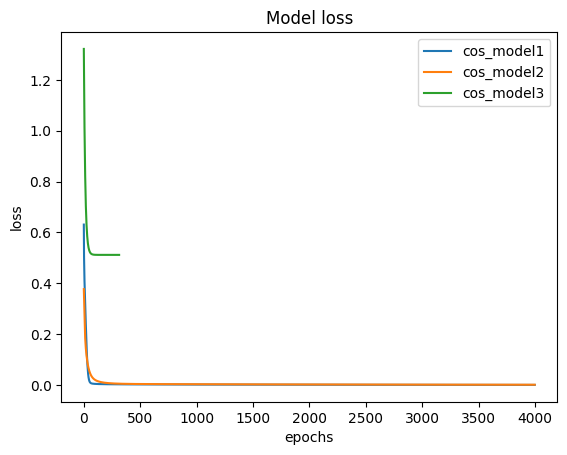

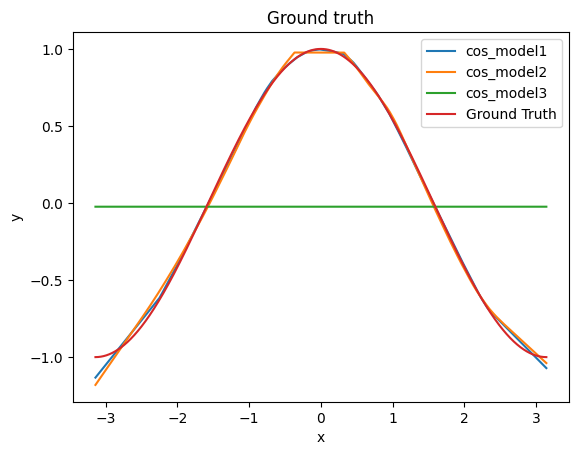

In [6]:
# Plotting model loss and ground truth for cosine neural networks
fig, ax = plt.subplots()
ax.plot(epochx1, lossy1, epochx2, lossy2, epochx3, lossy3)
ax.set(xlabel="epochs",ylabel="loss", title="Model loss")
ax.legend(labels=['cos_model1','cos_model2','cos_model3'])

fig2, ax2 = plt.subplots()
x = torch.linspace(-math.pi, math.pi, 5000, dtype=dtype)
y = torch.cos(x)

with torch.no_grad():
    m1_y = cos_model1(x.unsqueeze(1)).cpu().numpy()
    m2_y = cos_model2(x.unsqueeze(1)).cpu().numpy()
    m3_y = cos_model3(x.unsqueeze(1)).cpu().numpy()
    x = x.cpu().numpy()
    y = y.cpu().numpy()

ax2.plot(x, m1_y, x, m2_y, x, m3_y, x, y)
ax2.set(xlabel='x',ylabel='y', title='Ground truth')
ax2.legend(labels=['cos_model1', 'cos_model2','cos_model3', 'Ground Truth'])


## 1-1. Training on actual task

In [8]:
from torchvision import datasets
from torchvision.transforms import ToTensor
training_ds = datasets.MNIST(root="data", train=True, download=True, transform=ToTensor())
test_ds = datasets.MNIST(root='data', train=False, download=True, transform=ToTensor())

### Creating models

In [9]:
class NMISTNetwork1(nn.Module):
        """First CNN for NMIST"""
        def __init__(self):
            super().__init__()
            self.seq = nn.Sequential(
            nn.Conv2d(1, 32, 5), 
            nn.ReLU(),
            nn.Flatten(1), 
            nn.Linear(18432, 128),
            nn.Linear(128, 10),
            )
        
        def forward(self, x):
              output = self.seq(x)
              return output
        
class NMISTNetwork2(nn.Module):
        """Second CNN for NMIST"""
        def __init__(self):
            super().__init__()
            self.seq = nn.Sequential(
            nn.Conv2d(1, 32, 5), 
            nn.ReLU(),
            nn.Conv2d(32, 64, 5),
            nn.ReLU(),
            nn.Flatten(1), 
            nn.Linear(25600, 128),
            nn.Linear(128, 10),
            )
        
        def forward(self, x):
              output = self.seq(x)
              return output
        
class NMISTNetwork3(nn.Module):
        """Third CNN for NMIST"""
        def __init__(self):
            super().__init__()
            self.seq = nn.Sequential(
            nn.Conv2d(1, 32, 5), 
            nn.ReLU(),
            nn.Conv2d(32, 64, 5),
            nn.Dropout(.25),
            nn.ReLU(),
            nn.Conv2d(64, 64, 5),
            nn.Flatten(1), 
            nn.Linear(16384, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
            )
        
        def forward(self, x):
              output = self.seq(x)
              return output
        

nmist1, nmist2, nmist3 = NMISTNetwork1(), NMISTNetwork2(), NMISTNetwork3()
display_model_info('nmist1', nmist1)
display_model_info('nmist2', nmist2)
display_model_info('nmist3', nmist3)

NMISTNetwork1(
  (seq): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Flatten(start_dim=1, end_dim=-1)
    (3): Linear(in_features=18432, out_features=128, bias=True)
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)

'nmist1. parameters: 2361546'

NMISTNetwork2(
  (seq): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (3): ReLU()
    (4): Flatten(start_dim=1, end_dim=-1)
    (5): Linear(in_features=25600, out_features=128, bias=True)
    (6): Linear(in_features=128, out_features=10, bias=True)
  )
)

'nmist2. parameters: 3330314'

NMISTNetwork3(
  (seq): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (3): Dropout(p=0.25, inplace=False)
    (4): ReLU()
    (5): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1))
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=16384, out_features=128, bias=True)
    (8): ReLU()
    (9): Linear(in_features=128, out_features=10, bias=True)
  )
)

'nmist3. parameters: 2253130'

### Utility functions

In [10]:
def nmist_train_loop(dataloader, model, loss_fn, optimize, epoch):
    """Training loop funciton for non-linear function"""
    model.train()
    num_batches = len(dataloader)
    train_loss, correct = 0,0
    size = len(dataloader.dataset)

    for batch, (X, y) in enumerate(dataloader):
        X = X.to(device)
        optimize.zero_grad()
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        correct += (y_pred.argmax(dim=1) == y).type(torch.float).sum().item()

        loss.backward()
        optimize.step()
    
    train_loss /= num_batches
    correct /=size

    if epoch % 10 == 0:
        display(f"Epoch {epoch}. Accuracy: {(100*correct)}%, Avg loss: {train_loss}")

    return train_loss, correct
        
def nmist_val_loop(dataloader, model, loss_fn, epoch):
    """Eval loop function for non-linear function"""
    model.eval()
    size= len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0,0

    with torch.no_grad():
        for X,y in dataloader:
            X = X.to(device)
            y_pred = model(X)
            test_loss += loss_fn(y_pred, y).item()
            correct += (y_pred.argmax(dim=1) == y).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /=size

#    if epoch % 10 == 0:
#        display(f"Epoch {epoch}. Accuracy: {(100*correct)}%, Avg loss: {test_loss}")

    return test_loss, correct

### Training and Testing Loop

In [11]:
lossy1, lossy2, lossy3 = list(), list(), list()
epochx1, epochx2, epochx3 = list(), list(), list()
accy1, accy2, accy3 = list(), list(), list()

loss_fn = torch.nn.CrossEntropyLoss()
epochs = 75
lr = 1.5e-2
batch_size=150

training_dl = DataLoader(training_ds, batch_size=batch_size)
test_dl = DataLoader(test_ds, batch_size=batch_size)

patience = 5
best_val_loss = float('inf')
epochs_without_improvement = 0

optimizer1 = torch.optim.SGD(nmist1.parameters(), lr=lr)
display("Training & eval: nmist1 model")
for epoch in range(epochs):
    test_loss, correct = nmist_train_loop(training_dl, nmist1, loss_fn, optimizer1, epoch)
    val_loss, _ = nmist_val_loop(test_dl, nmist1, loss_fn, epoch)

    if epoch%2 == 0:
        epochx1.append(epoch)
        lossy1.append(test_loss)
        accy1.append(correct)
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement +=1

    if epochs_without_improvement >= patience:
        display(f'Convergence reached at {epoch}')
        if epoch%2 !=0:
            epochx1.append(epoch)
            lossy1.append(test_loss)
            accy1.append(correct)
        break
display("Done")

optimizer2 = torch.optim.SGD(nmist2.parameters(), lr=lr)
best_val_loss = float('inf')
epochs_without_improvement = 0
display("Training & eval: nmist2 model")
for epoch in range(epochs):
    test_loss, correct = nmist_train_loop(training_dl, nmist2, loss_fn, optimizer2, epoch)
    val_loss, _ = nmist_val_loop(test_dl, nmist2, loss_fn, epoch)

    if epoch%2 == 0:
        epochx2.append(epoch)
        lossy2.append(test_loss)
        accy2.append(correct)

    if val_loss < best_val_loss:
        best_val_loss = test_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement +=1

    if epochs_without_improvement >= patience:
        display(f'Convergence reached at {epoch}')
        if epoch%2 != 0:
            epochx2.append(epoch)
            lossy2.append(test_loss)
            accy2.append(correct)
        break
display("Done")

optimizer3 = torch.optim.SGD(nmist3.parameters(), lr=lr)
best_val_loss = float('inf')
epochs_without_improvement = 0
display("Training & eval: nmist3 model")
for epoch in range(epochs):
    test_loss, correct = nmist_train_loop(training_dl, nmist3, loss_fn, optimizer3, epoch)
    val_loss, _ = nmist_val_loop(test_dl, nmist3, loss_fn, epoch)

    if epoch%2 == 0:
        epochx3.append(epoch)
        lossy3.append(test_loss)
        accy3.append(correct)

    if val_loss < best_val_loss:
        best_val_loss = test_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement +=1

    if epochs_without_improvement >= patience:
        display(f'Convergence reached at {epoch}')
        if epoch%2 != 0:
            epochx3.append(epoch)
            lossy3.append(test_loss)
            accy3.append(correct)
        break
display("Done")

'Training & eval: nmist1 model'

'Epoch 0. Accuracy: 84.94333333333334%, Avg loss: 0.6238763699494302'

'Epoch 10. Accuracy: 96.41666666666666%, Avg loss: 0.1285963900643401'

'Epoch 20. Accuracy: 98.215%, Avg loss: 0.0639472272573039'

'Epoch 30. Accuracy: 98.74000000000001%, Avg loss: 0.04507152798003517'

'Epoch 40. Accuracy: 99.04666666666667%, Avg loss: 0.034809608717332595'

'Epoch 50. Accuracy: 99.30833333333334%, Avg loss: 0.027821590559906326'

'Convergence reached at 58'

'Done'

'Training & eval: nmist2 model'

'Epoch 0. Accuracy: 83.89333333333333%, Avg loss: 0.6082359640114009'

'Epoch 10. Accuracy: 98.37333333333333%, Avg loss: 0.05846752212033607'

'Convergence reached at 19'

'Done'

'Training & eval: nmist3 model'

'Epoch 0. Accuracy: 78.92166666666667%, Avg loss: 0.6984337988961488'

'Epoch 10. Accuracy: 98.4%, Avg loss: 0.05141434674704214'

'Convergence reached at 14'

'Done'

### Save models

In [12]:
torch.save(nmist1.state_dict(), 'nmist1_weights.pth')
torch.save(nmist2.state_dict(), 'nmist2_weights.pth')
torch.save(nmist3.state_dict(), 'nmist3_weights.pth')

### Plotting Models

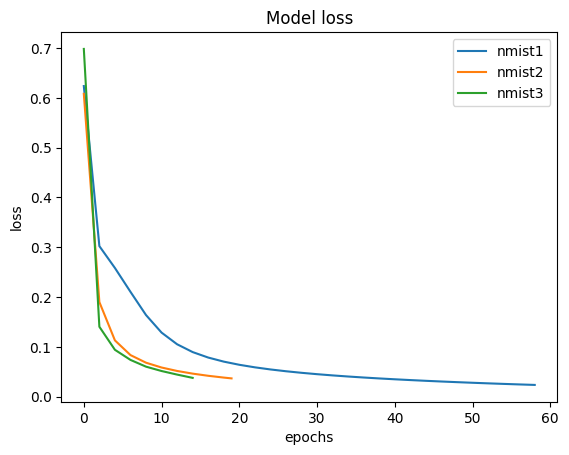

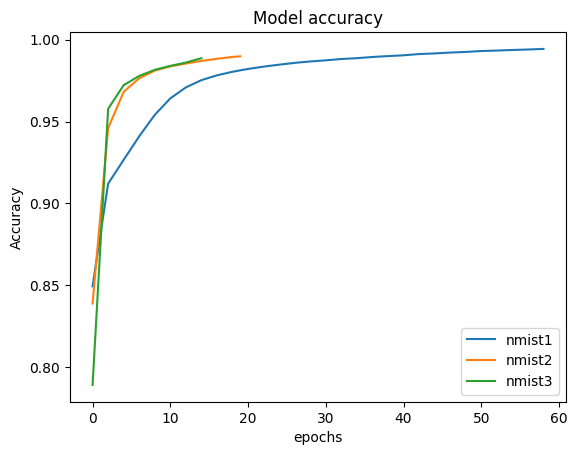

In [13]:
fig, ax = plt.subplots()
ax.plot(epochx1, lossy1, epochx2, lossy2, epochx3, lossy3)
ax.set(xlabel="epochs",ylabel="loss", title="Model loss")
ax.legend(labels=['nmist1','nmist2','nmist3'])

fig2, ax2 = plt.subplots()
x = torch.linspace(-math.pi, math.pi, 5000, dtype=dtype)
y = torch.cos(x)

ax2.plot(epochx1, accy1, epochx2, accy2, epochx3, accy3)
ax2.set(xlabel='epochs',ylabel='Accuracy', title='Model accuracy')
ax2.legend(labels=['nmist1', 'nmist2','nmist3'])
